# DiabetesMind: Predictive Modeling for Diabetes Diagnosis

## Project Overview

**DiabetesMind** is a binary classification project focused on predicting diabetes diagnoses using medical and patient profile data. The project addresses challenges common in clinical datasets, such as missing values, outlier presence, and class imbalance. Through targeted preprocessing, engineered feature construction, and ensemble-based modeling, the solution demonstrates high diagnostic performance despite limited dataset size.

## Objective
Develop a machine learning classifier to predict diabetes diagnoses based on medical and personal health indicators.

## Dataset
  - **Dataset Link**: [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/jhskaggle/diabetescsv)
  - **Samples**: 768
  - **Features**: 8 medical and patient profile attributes + 1 binary target (Outcome)

## Preprocessing & Feature Engineering

  - **Missing Value Handling**:
    - Features such as **Glucose, BloodPressure, SkinThickness, Insulin**, and **BMI** contained zero values that are **not medically plausible** and were treated as **missing**.
    - Rows with **three or more missing values in critical features** were removed to preserve data reliability.
    - Remaining missing entries were retained to leverage models with native missing value handling, such as **XGBoost and LightGBM**.

  - **Outlier Analysis**:
    - Conducted univariate and domain-driven analysis using **distribution plots, range checks, and medical threshold validation**.
    - Values falling outside **realistic clinical thresholds** were considered **data entry errors** and replaced with NaN.
    - Outliers within plausible medical boundaries were **retained** as valid variability in patient profiles.
    - Applied **standardization** to mitigate the influence of retained extreme values during model training.

  - **Feature Construction**:
    - Developed new features by combining existing attributes through **ratios and interactions** (e.g., Glucose_BMI) to capture complex patterns.
    - These engineered features helped improve model performance by extracting richer information from the dataset.
  - **Skewness Correction & Standardization**:
    - Applied **Yeo-Johnson transformation** to reduce skewness and normalize non-Gaussian distributions.
    - Performed **standard scaling** to normalize feature magnitudes and minimize the impact of extreme values across all numerical features.

  - **Class Imbalance Handling**
    - Tackled class imbalance by applying **oversampling** to the minority class, improving the model’s sensitivity to diabetic cases.
    - This approach enhanced the model’s generalization without introducing synthetic noise.

## Key Insights
  - **Random Forest** achieved the highest performance with an **F1 score of 87.2%** and a **recall of 92.9%**, demonstrating strong predictive capability in identifying diabetic patients.
  - Ensemble models such as **XGBoost, LightGBM, CatBoost and HistGradientBoosting** also performed competitively, benefiting from the engineered features and preprocessing strategies.
  - Comprehensive preprocessing and targeted feature engineering significantly enhanced model performance, demonstrating that thoughtful data preparation can overcome the limitations of small sample size and weak feature correlations.

##### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### EDA & Feature Engineering

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
160,4,151,90,38,0,29.7,0.294,36,0
367,0,101,64,17,0,21.0,0.252,21,0
440,0,189,104,25,0,34.3,0.435,41,1
290,0,78,88,29,40,36.9,0.434,21,0
758,1,106,76,0,0,37.5,0.197,26,0
390,1,100,66,29,196,32.0,0.444,42,0
719,5,97,76,27,0,35.6,0.378,52,1
608,0,152,82,39,272,41.5,0.270,27,0
612,7,168,88,42,321,38.2,0.787,40,1
699,4,118,70,0,0,44.5,0.904,26,0


##### Basic dataset structure and summary statistics

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### Check for missing and duplicated values

In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.duplicated().sum()

0

##### Correlation analysis

In [10]:
df.corr(numeric_only=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


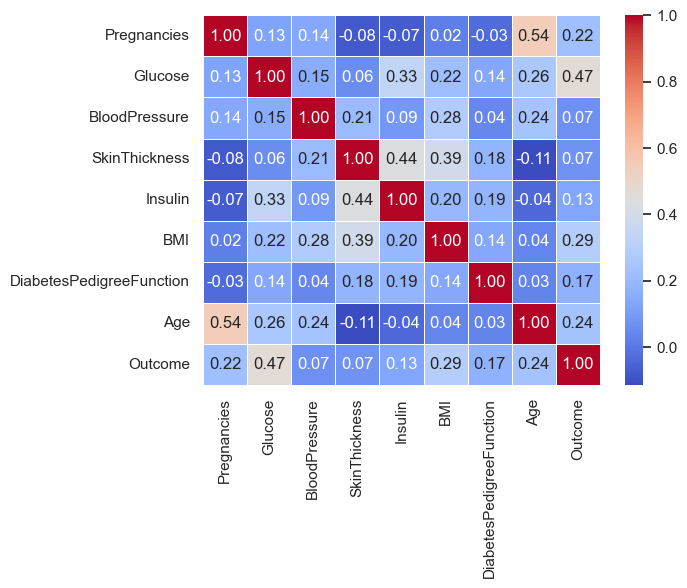

In [11]:
sns.heatmap(df.corr(), annot=True, fmt='0.2f', linewidth=.5, cmap="coolwarm")
plt.show()

##### Class distribution of the target variable

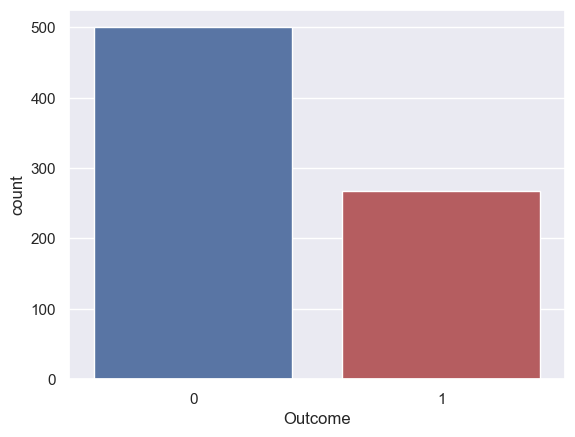

In [12]:
sns.countplot(x='Outcome', data=df, palette=['b','r'])
plt.show()

##### Univariate analysis of the 'Pregnancies' feature

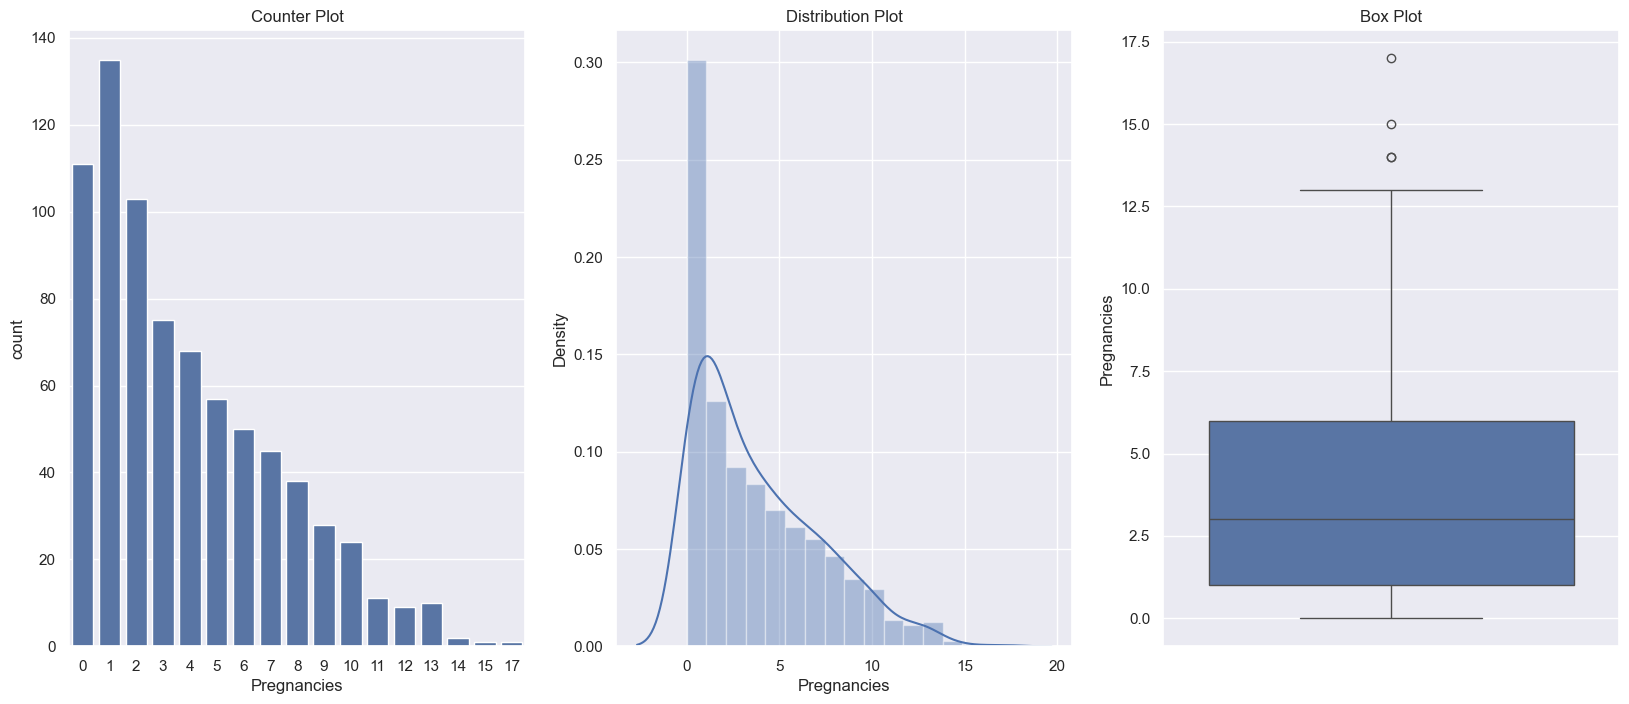

In [13]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.title('Counter Plot')
sns.countplot(x='Pregnancies', data=df)

plt.subplot(1,3,2)
plt.title('Distribution Plot')
sns.distplot(df['Pregnancies'])

plt.subplot(1,3,3)
plt.title('Box Plot')
sns.boxplot(y=df['Pregnancies'])
plt.show()

In [14]:
continuous_cols = [col for col in df.columns if col != 'Outcome']

##### Distribution and outlier analysis for all continuous features

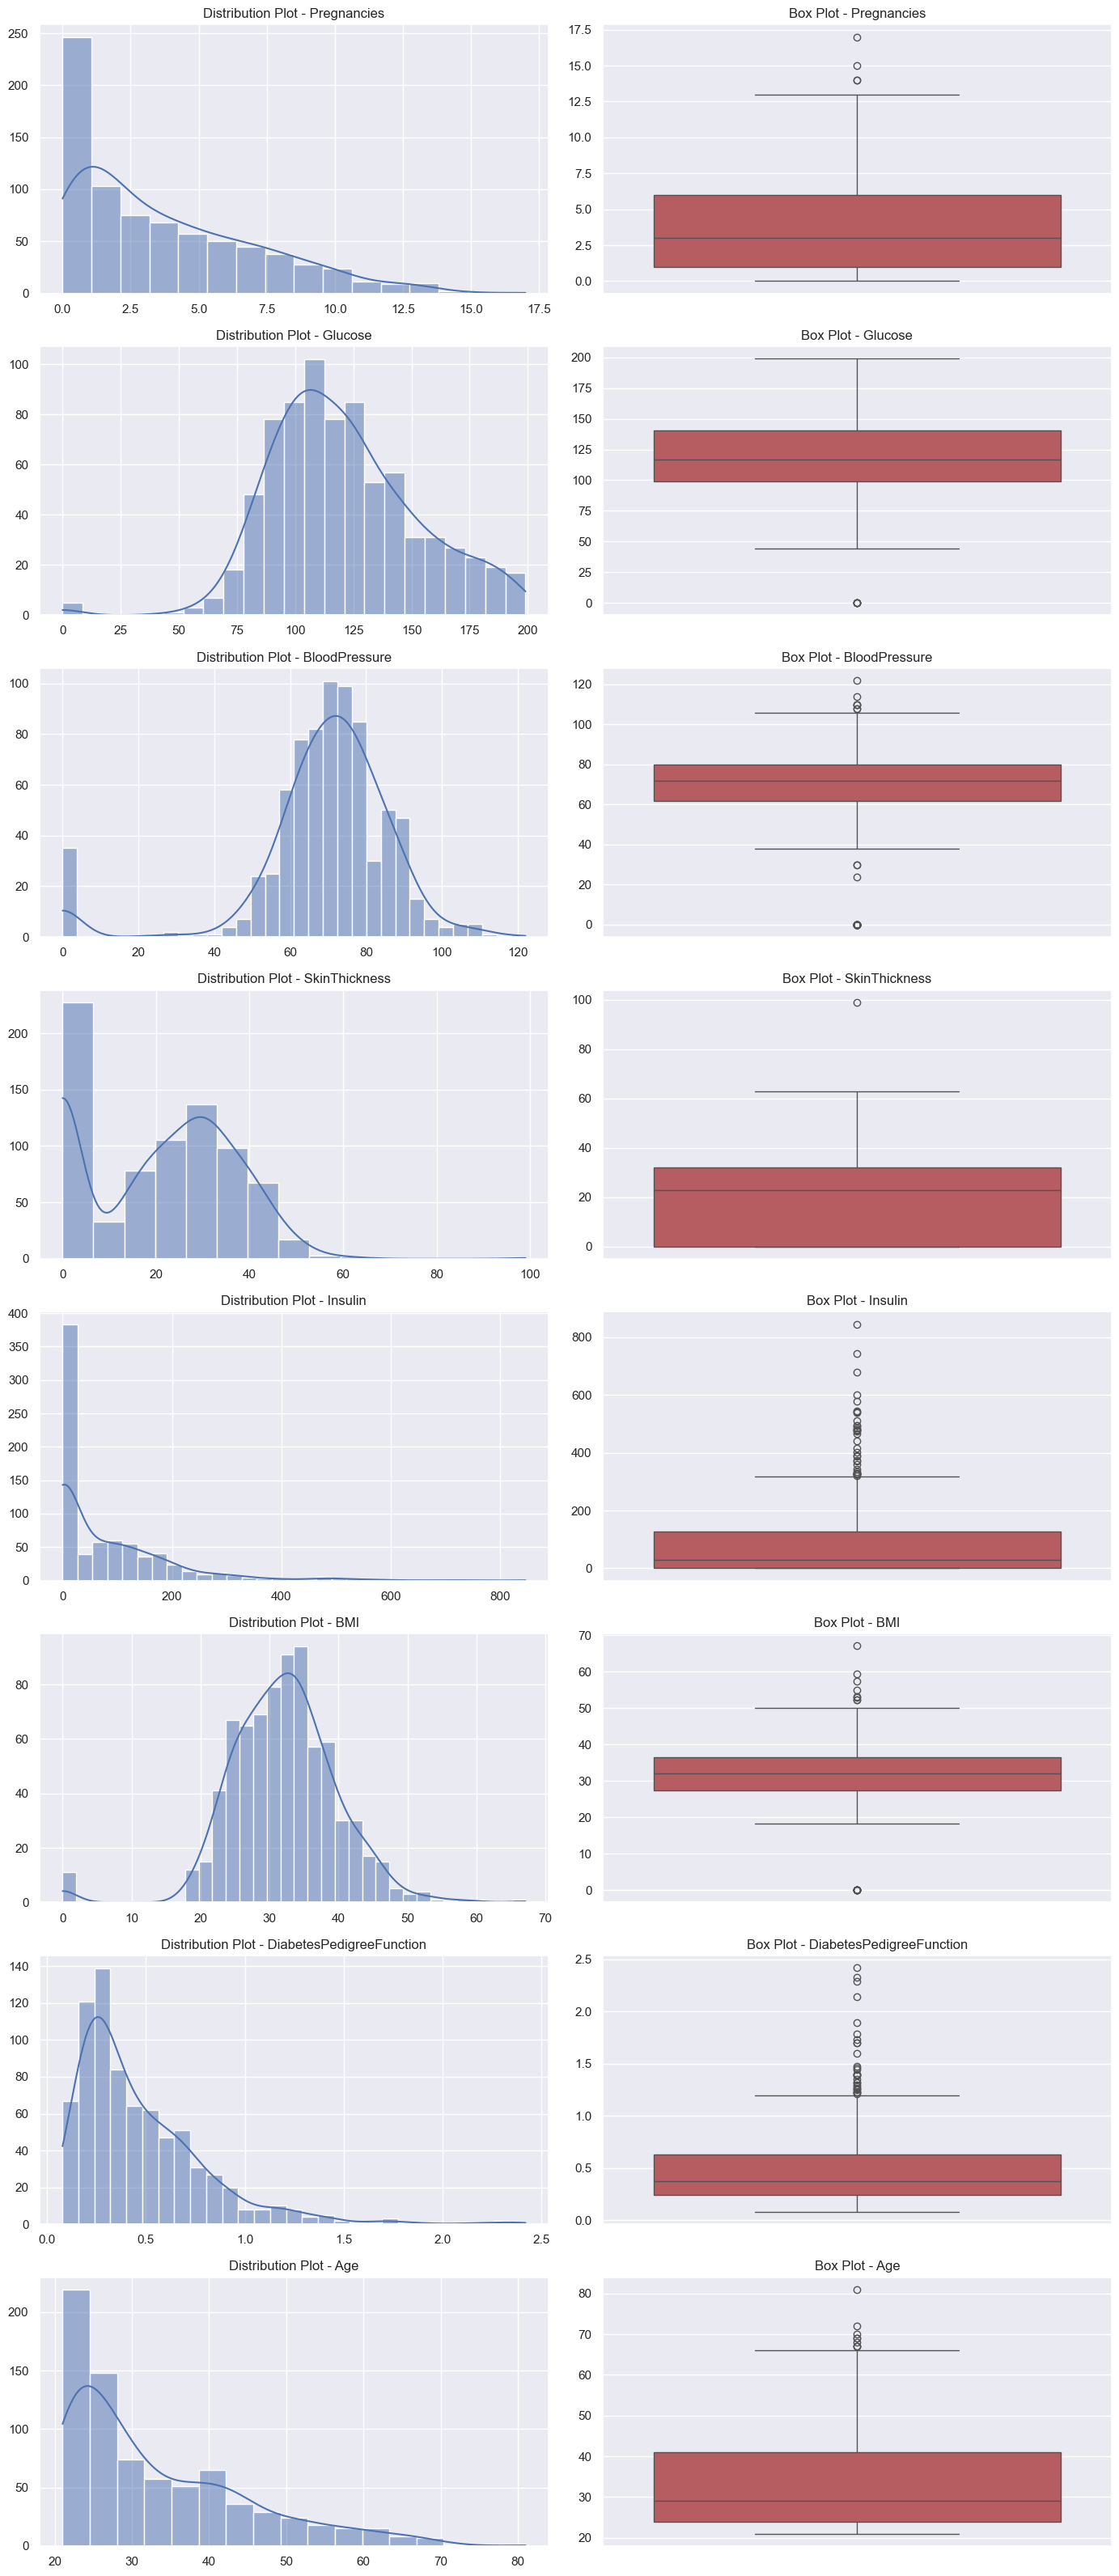

In [15]:
fig, axes = plt.subplots(len(continuous_cols), 2, figsize=(14, 4 * len(continuous_cols)))

for i, column in enumerate(continuous_cols):
    sns.histplot(df[column], kde=True, ax=axes[i, 0], color='b')
    axes[i, 0].set_title(f'Distribution Plot - {column}')
    
    sns.boxplot(y=df[column], ax=axes[i, 1], color='r')
    axes[i, 1].set_title(f'Box Plot - {column}')
    
    for ax in axes[i]:
        ax.set_xlabel('')
        ax.set_ylabel('')

plt.tight_layout()
plt.show()

#### Missing Values Representation

Several physiological features in the dataset — `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI` — contain zero values that are **medically implausible** and unlikely to represent actual measurements. 

These zeros are treated as **missing data** rather than valid observations. Accurately identifying and handling these values is critical to ensure the integrity of both the exploratory analysis and the predictive modeling process.

In [16]:
df[(df[df.columns[2:5]] == 0).all(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1
266,0,138,0,0,0,36.3,0.933,25,1


In [17]:
df[(df[df.columns[2:5]] == 0).all(axis=1)].shape[0]

33

In [18]:
df[(df[df.columns[2:6]] == 0).all(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
706,10,115,0,0,0,0.0,0.261,30,1


In [19]:
df[(df[df.columns[2:6]] == 0).all(axis=1)].shape[0]

7

In [20]:
zero_mask = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0
zero_mask

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,True,True,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
763,False,False,False,False,False
764,False,False,False,True,False
765,False,False,False,False,False
766,False,False,True,True,False


In [21]:
zero_patterns = zero_mask.astype(int).apply(lambda row: tuple(row), axis=1)
pattern_counts = zero_patterns.value_counts()

pattern_counts.head(10)

(0, 0, 0, 0, 0)    392
(0, 0, 1, 1, 0)    192
(0, 0, 0, 1, 0)    140
(0, 1, 1, 1, 0)     26
(0, 1, 1, 1, 1)      7
(1, 0, 0, 1, 0)      4
(0, 0, 1, 1, 1)      2
(0, 1, 0, 1, 0)      2
(0, 0, 0, 1, 1)      1
(1, 0, 0, 0, 0)      1
Name: count, dtype: int64

In [22]:
sum(zero_patterns == (1,0,0,0,1))

0

In [23]:
df.loc[(df['SkinThickness'] == 0) & (df['Insulin'] == 0) & (df['BMI'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0
706,10,115,0,0,0,0.0,0.261,30,1


In [24]:
df.loc[(df['SkinThickness'] == 0) & (df['Insulin'] == 0) & (df['BMI'] == 0)].shape[0]

9

In [25]:
high_missing_values = df[(df[df.columns[3:6]] == 0).all(axis=1)]
high_missing_values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0
706,10,115,0,0,0,0.0,0.261,30,1


In [26]:
df = df.drop(index=high_missing_values.index)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [27]:
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [28]:
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)

In [29]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                28
SkinThickness               218
Insulin                     365
BMI                           2
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

##### **Handling Rows with High Missingness**

Rows with three or more missing values among the key features listed above were deemed too incomplete for reliable imputation and may reduce model performance.

**Actions Taken**:
  - Dropped rows with ≥3 missing values across `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI`.
  - Replaced remaining zeros in these features with `NaN`.

Given the medical context, imputation was avoided. Instead, models capable of handling `NaN` values (e.g., `XGBoost`, `LightGBM`) will be used to preserve natural data variance and reduce bias introduced by assumptions during imputation.

#### Outlier Detection and Analysis

Outliers across continuous features are identified using the **Interquartile Range (IQR)** method, which flags data points lying significantly beyond the typical spread of values.

This statistical approach enables:
- **Detection of anomalies** that may arise from measurement errors, rare conditions, or extreme physiological states.
- **Preservation of data integrity** by distinguishing influential data points that could distort model training.

While some outliers may reflect legitimate medical extremes (e.g., very high insulin levels in diabetic patients), careful evaluation is performed to ensure they **do not unduly skew predictions or bias parameter estimation**.

In [30]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,759.000000,754.000000,731.000000,541.000000,394.000000,757.000000,759.000000,759.000000,759.000000
mean,3.833992,121.909814,72.359781,29.153420,155.548223,32.457464,0.474227,33.249012,0.350461
std,3.371282,30.569492,12.363134,10.476982,118.775855,6.924988,0.332214,11.699285,0.477429
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,22.000000,76.250000,27.500000,0.244500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.378000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.628000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### Outlier calculation using the IQR method for key numerical features

In [31]:
features_to_check = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                     'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

outlier_summary = []

for col in features_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary.append({
        'Feature': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': len(outliers)
    })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df

,Feature,Q1,Q3,IQR,Lower Bound,Upper Bound,Outlier Count
0,Pregnancies,1.0000,6.000,5.0000,-6.50000,13.50000,4
1,Glucose,100.0000,141.000,41.0000,38.50000,202.50000,0
2,BloodPressure,64.0000,80.000,16.0000,40.00000,104.00000,14
3,SkinThickness,22.0000,36.000,14.0000,1.00000,57.00000,3
4,Insulin,76.2500,190.000,113.7500,-94.37500,360.62500,24
5,BMI,27.5000,36.600,9.1000,13.85000,50.25000,8
6,DiabetesPedigreeFunction,0.2445,0.628,0.3835,-0.33075,1.20325,29
7,Age,24.0000,41.000,17.0000,-1.50000,66.50000,8


##### Visualizing Outliers with Boxplots

Boxplots offer a **visual overview** of value distributions and outlier presence across key numerical features.

These plots help to:
- **Confirm statistical outlier detection** performed using IQR.
- **Highlight skewness** and the presence of **extreme values** that may influence model behavior.
- Identify variables with **asymmetric distributions** or unusually wide spreads, guiding decisions on potential transformations or robust modeling strategies.

This visual inspection complements quantitative analysis, ensuring a more informed approach to handling anomalous data points.

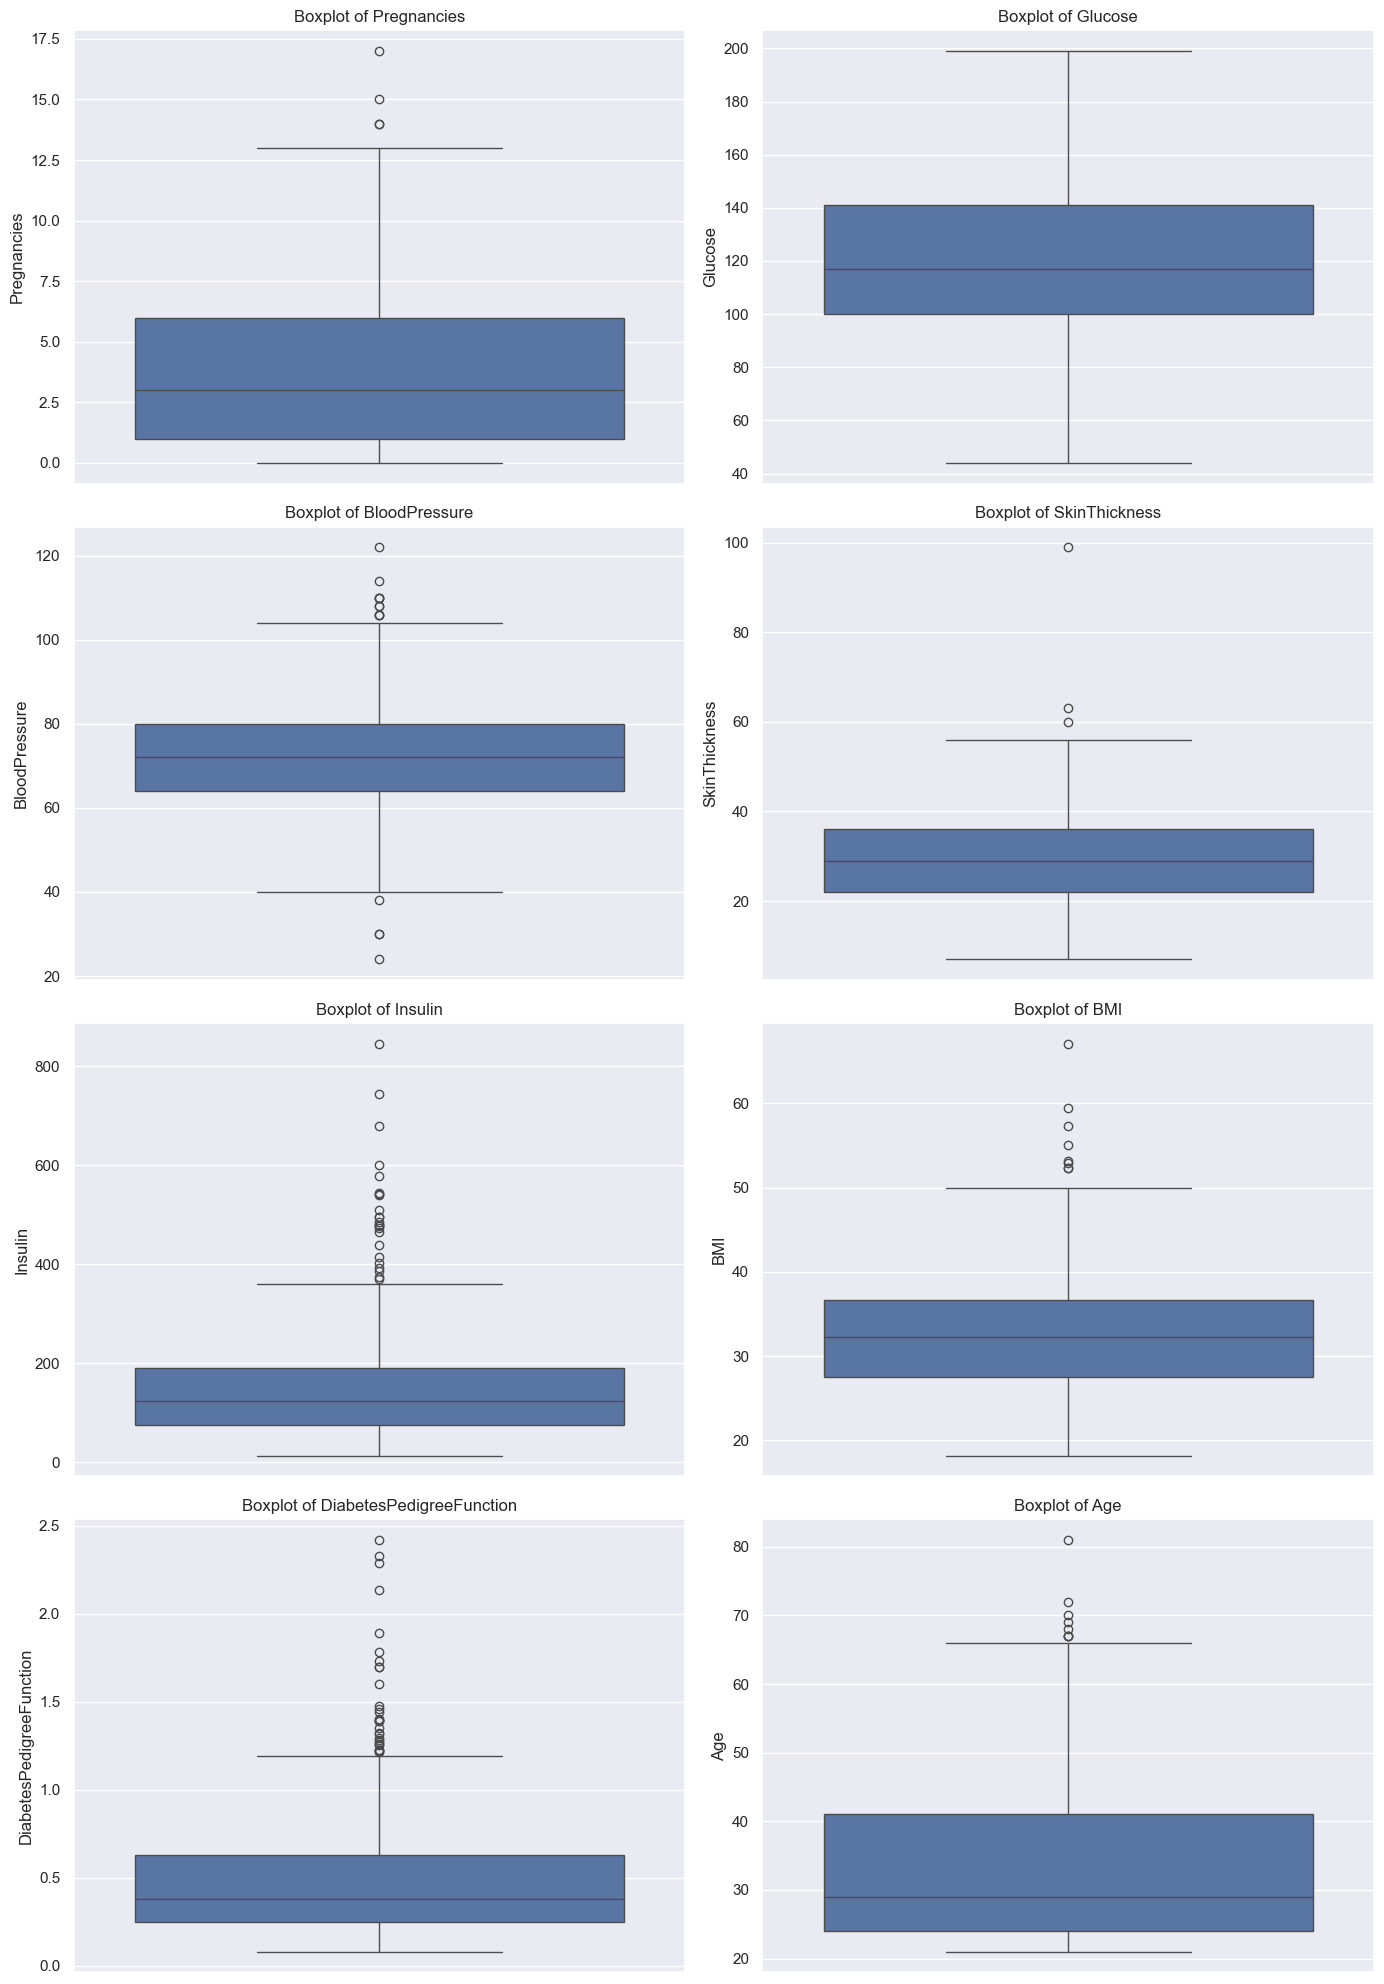

In [32]:
plt.figure(figsize=(14, 20))
for i, col in enumerate(features_to_check, 1):
    plt.subplot(4, 2, i)  
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

##### **Outlier Detection: Pregnancies**

The **Pregnancies** feature represents the number of times a patient has been pregnant.  
The **IQR-based analysis** flagged **4 outliers** exceeding the upper bound of **13.5**, with a maximum recorded value of **17**.

In [33]:
df[['Pregnancies']].describe()

,Pregnancies
count,759.000000
mean,3.833992
std,3.371282
min,0.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,17.000000


In [34]:
p_upper = outlier_df[outlier_df['Feature'] == 'Pregnancies']['Upper Bound'].values[0]
p_upper

13.5

In [35]:
df[df['Pregnancies'] > p_upper]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1
455,14,175.0,62.0,30.0,NaN,33.6,0.212,38,1


##### **Outlier Analysis: Pregnancies Feature**

Although these values are statistically distant from the majority, they remain within a **medically plausible range**.  
High pregnancy counts may reflect rare but valid clinical cases and do not necessarily indicate data entry errors.

##### **Outlier Detection: Glucose**

The **Glucose** feature represents the plasma glucose concentration measured during an oral glucose tolerance test.  
Using the **Interquartile Range (IQR)** method, the calculated lower and upper bounds were **36.0** and **204.0**, respectively.  
**No outliers** were detected within this range, even though the maximum observed value reached **199**.

In [36]:
df[['Glucose']].describe()

,Glucose
count,754.000000
mean,121.909814
std,30.569492
min,44.000000
25%,100.000000
50%,117.000000
75%,141.000000
max,199.000000


##### **Outlier Analysis: Glucose**

All **Glucose** values fall within statistically acceptable bounds based on the **Interquartile Range (IQR)** method.  
Although upper values—such as **199 mg/dL**—are elevated, they remain clinically plausible and align with hyperglycemic states commonly observed in diabetic patients.

##### **Outlier Detection: BloodPressure**

The **BloodPressure** feature reflects diastolic blood pressure measured in mm Hg.  
Using the **Interquartile Range (IQR)** method, values below **40.0** or above **104.0** are considered outliers.  
A total of **14 records** fall outside this range, with observed values spanning from **24 mm Hg** to **122 mm Hg**.

In [37]:
df[['BloodPressure']].describe()

,BloodPressure
count,731.000000
mean,72.359781
std,12.363134
min,24.000000
25%,64.000000
50%,72.000000
75%,80.000000
max,122.000000


In [38]:
bp_lower = outlier_df[outlier_df['Feature'] == 'BloodPressure']['Lower Bound'].values[0]
bp_lower

40.0

In [39]:
bp_upper = outlier_df[outlier_df['Feature'] == 'BloodPressure']['Upper Bound'].values[0]
bp_upper

104.0

In [40]:
df[(df['BloodPressure'] < bp_lower) | (df['BloodPressure'] > bp_upper)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
18,1,103.0,30.0,38.0,83.0,43.3,0.183,33,0
43,9,171.0,110.0,24.0,240.0,45.4,0.721,54,1
84,5,137.0,108.0,NaN,NaN,48.8,0.227,37,1
106,1,96.0,122.0,NaN,NaN,22.4,0.207,27,0
125,1,88.0,30.0,42.0,99.0,55.0,0.496,26,1
177,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1
362,5,103.0,108.0,37.0,NaN,39.2,0.305,65,0
549,4,189.0,110.0,31.0,NaN,28.5,0.680,37,0
597,1,89.0,24.0,19.0,25.0,27.8,0.559,21,0
599,1,109.0,38.0,18.0,120.0,23.1,0.407,26,0


In [41]:
df[df['BloodPressure'] < bp_lower]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
18,1,103.0,30.0,38.0,83.0,43.3,0.183,33,0
125,1,88.0,30.0,42.0,99.0,55.0,0.496,26,1
597,1,89.0,24.0,19.0,25.0,27.8,0.559,21,0
599,1,109.0,38.0,18.0,120.0,23.1,0.407,26,0


In [42]:
df.loc[df['BloodPressure'] < bp_lower, 'BloodPressure'] = np.nan

##### **Outlier Analysis: BloodPressure**

Elevated blood pressure values above the upper IQR bound (**104 mm Hg**) may reflect hypertensive conditions and are clinically plausible.  
In contrast, extremely low readings (e.g., **24 mm Hg**, **30 mm Hg**, **38 mm Hg**) fall below physiological viability and are likely due to data entry or measurement errors.  
To preserve data integrity, these values should be marked as **missing (NaN)** for further consideration.

##### **Outlier Detection: SkinThickness**

The `SkinThickness` feature measures triceps skinfold thickness in millimeters and serves as an estimate of subcutaneous fat.  
Using the **Interquartile Range (IQR)** method, values below **1.0 mm** or above **57.0 mm** are considered outliers.  
**Three records** fall outside this range, with observed values of **60 mm**, **63 mm**, and **99 mm**.

In [43]:
df[['SkinThickness']].describe()

,SkinThickness
count,541.000000
mean,29.153420
std,10.476982
min,7.000000
25%,22.000000
50%,29.000000
75%,36.000000
max,99.000000


In [44]:
st_lower = outlier_df[outlier_df['Feature'] == 'SkinThickness']['Lower Bound'].values[0]
st_lower

1.0

In [45]:
st_upper = outlier_df[outlier_df['Feature'] == 'SkinThickness']['Upper Bound'].values[0]
st_upper

57.0

In [46]:
df[(df['SkinThickness'] < st_lower) | (df['SkinThickness'] > st_upper)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
57,0,100.0,88.0,60.0,110.0,46.8,0.962,31,0
445,0,180.0,78.0,63.0,14.0,59.4,2.420,25,1
579,2,197.0,70.0,99.0,NaN,34.7,0.575,62,1


In [47]:
df.loc[df['SkinThickness'] == 99, 'SkinThickness'] = np.nan
df.loc[[579]]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197.0,70.0,NaN,NaN,34.7,0.575,62,1


##### **Outlier Analysis: SkinThickness**

Skinfold thickness values of **60 mm** and **63 mm**, though uncommon, are observed alongside very high **BMI scores** (**46.8** and **59.4**, respectively), supporting their plausibility in individuals with significant adiposity.  
In contrast, the **99 mm** value is not only inconsistent with its associated **BMI of 34.7**, but also exceeds medically realistic limits for triceps skinfold measurements.  
This suggests the **99 mm** entry is likely a data entry or measurement error and should be marked as missing (`NaN`) to preserve data reliability.

##### **Outlier Detection: Insulin**

The `Insulin` feature measures serum insulin levels in µU/mL, which can provide insights into insulin resistance and pancreatic function.  
Using the Interquartile Range (IQR) method, values above **360.625 µU/mL** are considered outliers.  
A total of **24 records** exceed this threshold, with insulin levels ranging from **370 µU/mL** up to an extreme of **846 µU/mL**.

In [48]:
df[['Insulin']].describe()

,Insulin
count,394.000000
mean,155.548223
std,118.775855
min,14.000000
25%,76.250000
50%,125.000000
75%,190.000000
max,846.000000


In [49]:
ins_lower = outlier_df[outlier_df['Feature'] == 'Insulin']['Lower Bound'].values[0]
ins_lower

-94.375

In [50]:
ins_upper = outlier_df[outlier_df['Feature'] == 'Insulin']['Upper Bound'].values[0]
ins_upper

360.625

In [51]:
df[df['Insulin'] > ins_upper]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
111,8,155.0,62.0,26.0,495.0,34.0,0.543,46,1
153,1,153.0,82.0,42.0,485.0,40.6,0.687,23,0
186,8,181.0,68.0,36.0,495.0,30.1,0.615,60,1
220,0,177.0,60.0,29.0,478.0,34.6,1.072,21,1
228,4,197.0,70.0,39.0,744.0,36.7,2.329,31,0
231,6,134.0,80.0,37.0,370.0,46.2,0.238,46,1
247,0,165.0,90.0,33.0,680.0,52.3,0.427,23,0
248,9,124.0,70.0,33.0,402.0,35.4,0.282,34,0


In [52]:
df.loc[[13,228,584],'Insulin'] = np.nan

##### **Outlier Analysis: Insulin**

Serum insulin values above **360 µU/mL** are uncommon but can occur in individuals with severe insulin resistance, particularly those with high BMI.  
Several elevated insulin values in the dataset (e.g., **543**, **680 µU/mL**) are accompanied by notably high BMI scores (e.g., **38.7**, **52.3**), making them plausible in the context of obesity.

However, extreme values such as:
- **846 µU/mL** (BMI = 30.1)  
- **744 µU/mL** (BMI = 36.7)  
- **600 µU/mL** (BMI = 28.7)  

fall outside typical medical expectations and were treated as missing (`NaN`) due to their lack of supporting clinical context.

This targeted handling helps preserve potentially meaningful high values while minimizing the impact of likely data errors.

##### **Outlier Detection: BMI**

**Body Mass Index (BMI)** estimates body fat based on a person’s weight and height.  
Using the **Interquartile Range (IQR)** method, the upper bound for BMI was determined to be **50.25**, beyond which **eight records** are considered outliers.

These include the following values:  
**52.3**, **52.9**, **53.2**, **55.0**, **57.3**, **59.4**, and **67.1**.

In [53]:
df[['BMI']].describe()

,BMI
count,757.000000
mean,32.457464
std,6.924988
min,18.200000
25%,27.500000
50%,32.300000
75%,36.600000
max,67.100000


In [54]:
bmi_lower = outlier_df[outlier_df['Feature'] == 'BMI']['Lower Bound'].values[0]
bmi_lower

13.849999999999998

In [55]:
bmi_upper = outlier_df[outlier_df['Feature'] == 'BMI']['Upper Bound'].values[0]
bmi_upper

50.25

In [56]:
df[df['BMI'] > bmi_upper]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
120,0,162.0,76.0,56.0,100.0,53.2,0.759,25,1
125,1,88.0,NaN,42.0,99.0,55.0,0.496,26,1
177,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1
193,11,135.0,NaN,NaN,NaN,52.3,0.578,40,1
247,0,165.0,90.0,33.0,680.0,52.3,0.427,23,0
303,5,115.0,98.0,NaN,NaN,52.9,0.209,28,1
445,0,180.0,78.0,63.0,14.0,59.4,2.420,25,1
673,3,123.0,100.0,35.0,240.0,57.3,0.880,22,0


In [57]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.126643,0.202614,0.110540,0.084316,0.021719,-0.032421,0.548467,0.218156
Glucose,0.126643,1.000000,0.215021,0.207306,0.581818,0.232771,0.131725,0.262118,0.494452
BloodPressure,0.202614,0.215021,1.000000,0.251221,0.102581,0.316863,-0.004896,0.325985,0.170936
SkinThickness,0.110540,0.207306,0.251221,1.000000,0.206754,0.673379,0.117465,0.138600,0.253102
Insulin,0.084316,0.581818,0.102581,0.206754,1.000000,0.259315,0.075729,0.178835,0.309248
BMI,0.021719,0.232771,0.316863,0.673379,0.259315,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.032421,0.131725,-0.004896,0.117465,0.075729,0.155382,1.000000,0.028391,0.173813
Age,0.548467,0.262118,0.325985,0.138600,0.178835,0.025841,0.028391,1.000000,0.237552
Outcome,0.218156,0.494452,0.170936,0.253102,0.309248,0.313680,0.173813,0.237552,1.000000


##### **Outlier Analysis: BMI**

Although these BMI values exceed the statistical threshold, they are plausible in the context of **extreme obesity**.  
Such levels, while uncommon, are observed in clinical cases and are consistent with other features like **high skinfold thickness** or **elevated insulin levels**.  

Since there is no clear evidence of error or inconsistency, these records were **retained** to reflect the full range of body composition present in the dataset.

##### Outlier Detection: `DiabetesPedigreeFunction`

The `DiabetesPedigreeFunction` captures **genetic susceptibility** to diabetes based on family history.

Using the **Interquartile Range (IQR)** method:
- Values above **1.203** are flagged as outliers.
- **29 records** exceed this threshold, with values ranging from **1.22 to 2.42**.

These elevated values may represent individuals with **unusually strong familial risk**, and warrant closer examination for their potential impact on model behavior and interpretability.

In [58]:
df[['DiabetesPedigreeFunction']].describe()

,DiabetesPedigreeFunction
count,759.000000
mean,0.474227
std,0.332214
min,0.078000
25%,0.244500
50%,0.378000
75%,0.628000
max,2.420000


In [59]:
dpf_lower = outlier_df[outlier_df['Feature'] == 'DiabetesPedigreeFunction']['Lower Bound'].values[0]
dpf_lower

-0.33075000000000004

In [60]:
dpf_upper = outlier_df[outlier_df['Feature'] == 'DiabetesPedigreeFunction']['Upper Bound'].values[0]
dpf_upper

1.2032500000000002

In [61]:
df[df['DiabetesPedigreeFunction'] > dpf_upper]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
12,10,139.0,80.0,NaN,NaN,27.1,1.441,57,0
39,4,111.0,72.0,47.0,207.0,37.1,1.390,56,1
45,0,180.0,66.0,39.0,NaN,42.0,1.893,25,1
58,0,146.0,82.0,NaN,NaN,40.5,1.781,44,0
100,1,163.0,72.0,NaN,NaN,39.0,1.222,33,1
147,2,106.0,64.0,35.0,119.0,30.5,1.400,34,0
187,1,128.0,98.0,41.0,58.0,32.0,1.321,33,1
218,5,85.0,74.0,22.0,NaN,29.0,1.224,32,1
228,4,197.0,70.0,39.0,NaN,36.7,2.329,31,0


In [62]:
len(df[df['DiabetesPedigreeFunction'] > dpf_upper])

29

##### **Outlier Analysis: DiabetesPedigreeFunction**

While these `DiabetesPedigreeFunction (DPF)` values are statistically unusual, they are **medically plausible**, especially in individuals with a strong **family history of diabetes**.  
Most high-DPF entries are accompanied by other risk factors such as **elevated glucose**, **high insulin levels**, or **obesity**, which supports their validity.

For example:
- A DPF of **2.420** is associated with **180 glucose**, **59.4 BMI**, and a **positive diabetes diagnosis**.  
- A DPF of **2.329** corresponds to a **glucose level of 197**, indicating **hyperglycemia**.

Since these values align with known diabetes risk profiles and show **no clear signs of data entry error**, they were **retained as valid records**.

##### **Outlier Detection: Age**

The `Age` distribution in the dataset ranges from **21 to 81 years**, with an **interquartile range (IQR)** of **17 years**.  
Using the IQR method, the **upper bound** was calculated as **66.5**, identifying **9 records** as outliers with ages ranging from **67 to 81**.  
No outliers were detected below the lower bound, indicating that younger ages fall within the expected distribution range.

In [63]:
df[['Age']].describe()

,Age
count,759.000000
mean,33.249012
std,11.699285
min,21.000000
25%,24.000000
50%,29.000000
75%,41.000000
max,81.000000


In [64]:
age_lower = outlier_df[outlier_df['Feature'] == 'Age']['Lower Bound'].values[0]
age_lower

-1.5

In [65]:
age_upper = outlier_df[outlier_df['Feature'] == 'Age']['Upper Bound'].values[0]
age_upper

66.5

In [66]:
df[df['Age'] > age_upper]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132.0,80.0,NaN,NaN,26.8,0.186,69,0
363,4,146.0,78.0,NaN,NaN,38.5,0.520,67,1
453,2,119.0,NaN,NaN,NaN,19.6,0.832,72,0
459,9,134.0,74.0,33.0,60.0,25.9,0.460,81,0
489,8,194.0,80.0,NaN,NaN,26.1,0.551,67,0
537,0,57.0,60.0,NaN,NaN,21.7,0.735,67,0
666,4,145.0,82.0,18.0,NaN,32.5,0.235,70,1
674,8,91.0,82.0,NaN,NaN,35.6,0.587,68,0


##### **Outlier Analysis: Age**

The outlier values (**67–81 years**) are medically plausible and fall within a reasonable adult age range.  
Their associated feature values (e.g., `Glucose`, `BMI`) are also within valid limits, indicating no signs of data entry errors.  
As such, these records were retained to preserve the natural distribution and variability of the dataset.

#### New Feature Creation

Deriving **new features** to capture **nonlinear relationships**, **interactions**, and **clinical patterns** not fully represented by the original variables—aimed at improving the model’s **predictive power** and **interpretability**.

##### Feature: `High_Glucose` (Binary)

Created to flag individuals with glucose levels above the clinical threshold of 140 mg/dL, indicating **hyperglycemia**.

Given the **strongest correlation** between `Glucose` and diabetes outcome (`r = 0.49`), this binary indicator effectively highlights elevated diabetes risk, improving the model’s ability to detect clinically relevant glucose levels.

In [67]:
df['High_Glucose'] = df['Glucose'].apply(lambda x: 1 if x > 140 else 0)

In [68]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,High_Glucose
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1,0


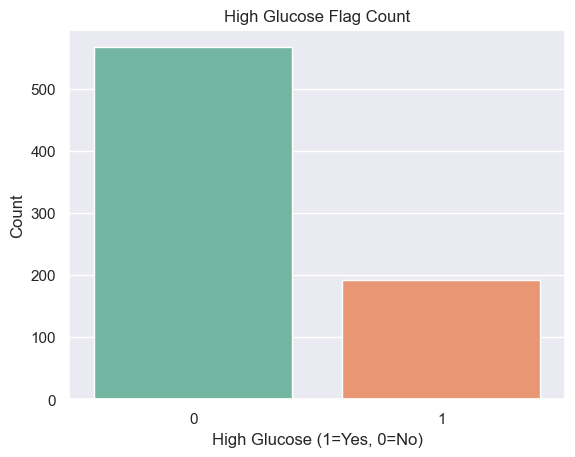

In [69]:
sns.countplot(x='High_Glucose', data=df, palette='Set2')
plt.title('High Glucose Flag Count')
plt.xlabel('High Glucose (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

In [70]:
df.pivot_table(index='High_Glucose', columns='Outcome', aggfunc='count')

Age       BMI      BloodPressure      DiabetesPedigreeFunction  \
Outcome         0    1    0    1             0    1                        0   
High_Glucose                                                                   
0             433  134  431  134           417  125                      433   
1              60  132   60  132            60  125                       60   

                  Glucose      Insulin     Pregnancies      SkinThickness      
Outcome         1       0    1       0   1           0    1             0   1  
High_Glucose                                                                   
0             134     430  132     229  59         433  134           318  88  
1             132      60  132      34  69          60  132            43  91

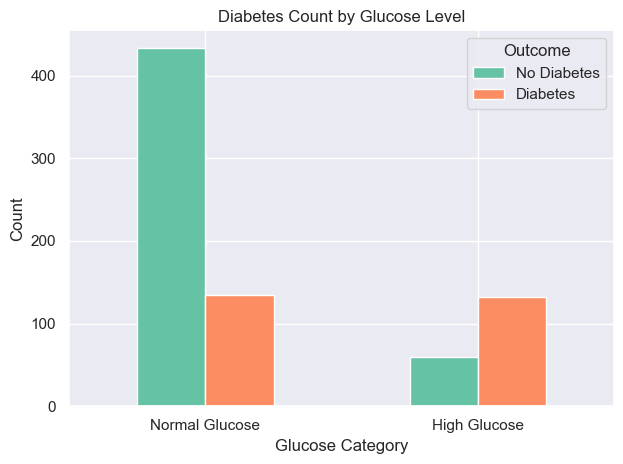

In [71]:
pivot_glucose = df.pivot_table(index='High_Glucose', columns='Outcome', aggfunc='size')

pivot_glucose.index = pivot_glucose.index.map({0: 'Normal Glucose', 1: 'High Glucose'})

pivot_glucose.plot(kind='bar', color=sns.color_palette('Set2', n_colors=2))

plt.title('Diabetes Count by Glucose Level')
plt.xlabel('Glucose Category')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['No Diabetes', 'Diabetes'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [72]:
df.groupby(['High_Glucose', 'Outcome']).mean(numeric_only=True)

Pregnancies     Glucose  BloodPressure  SkinThickness  \
High_Glucose Outcome                                                          
0            0           3.214781  104.369767      70.498801      26.767296   
             1           4.820896  117.371212      73.976000      32.534091   
1            0           3.866667  157.066667      75.333333      30.697674   
             1           4.848485  167.606061      76.864000      32.725275   

                         Insulin        BMI  DiabetesPedigreeFunction  \
High_Glucose Outcome                                                    
0            0        112.454148  30.539443                  0.422630   
             1        149.915254  35.088060                  0.556866   
1            0        232.352941  33.160000                  0.498300   
             1        240.565217  35.730303                  0.548644   

                            Age  
High_Glucose Outcome             
0            0        30.411085  
             1        35.417910  
1            0        36.966667  
             1        38.666667

In [73]:
df[['High_Glucose', 'Outcome']].corr()

,High_Glucose,Outcome
High_Glucose,1.000000,0.411071
Outcome,0.411071,1.000000


##### Analysis of Diabetes by `High_Glucose`

The grouped bar chart and summary statistics demonstrate a strong association between elevated glucose levels and **diabetes prevalence**:

- Individuals classified as `High_Glucose` exhibit a **diabetes rate of ~69%**, in stark contrast to ~24% among those with normal glucose levels.
- Diabetic individuals in the `High_Glucose` group show the highest averages in:
  - `Glucose`: **167.6 mg/dL**
  - `Insulin`: **240.6 µU/mL**
  - `BMI`: **35.7**
  - `Age`: **38.7**
- Non-diabetic individuals with normal glucose present significantly lower values across these key health indicators.

The **moderate positive correlation** between `High_Glucose` and `Outcome` (`r = 0.41`) reinforces its utility as a **strong predictive feature**. These findings underscore the importance of glucose status as a key factor in distinguishing individuals at risk for diabetes in classification models.

##### Feature: `Glucose_BMI` (Numeric)

Created to capture the interaction between `Glucose` and `BMI`, two key risk factors for diabetes.

With `Glucose` showing a **strong correlation** (`r = 0.49`) and `BMI` a **moderate correlation** (`r = 0.31`) with the diabetes outcome, this combined feature aims to enhance the model’s sensitivity to their **compounding effects** on diabetes risk.

In [74]:
df[['Glucose','BMI', 'Outcome']].corr()

,Glucose,BMI,Outcome
Glucose,1.000000,0.232771,0.494452
BMI,0.232771,1.000000,0.313680
Outcome,0.494452,0.313680,1.000000


In [75]:
df['Glucose_BMI'] = df['Glucose'] * df['BMI']

In [76]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,High_Glucose,Glucose_BMI
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,1,4972.8
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,0,2261.0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,1,4263.9
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,2500.9
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,5904.7
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,0,3322.9
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0,0,4489.6
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,0,3170.2
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1,0,3792.6


In [77]:
df[['Glucose_BMI', 'Outcome']].corr(numeric_only=True)

,Glucose_BMI,Outcome
Glucose_BMI,1.000000,0.519287
Outcome,0.519287,1.000000


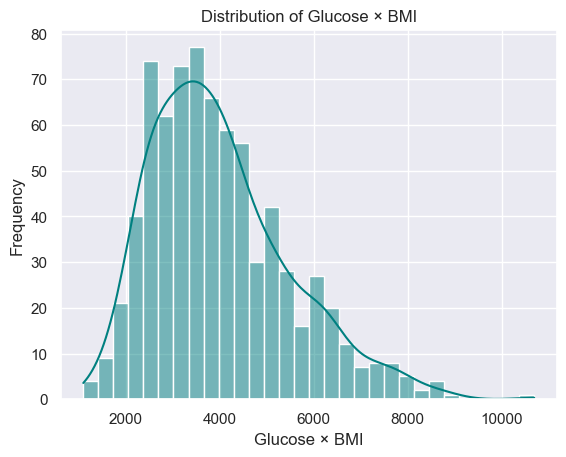

In [78]:
sns.histplot(df['Glucose_BMI'], kde=True, bins=30, color='teal')
plt.title('Distribution of Glucose × BMI')
plt.xlabel('Glucose × BMI')
plt.ylabel('Frequency')
plt.show()

In [79]:
df[['Glucose_BMI']].describe()

,Glucose_BMI
count,752.000000
mean,4006.858378
std,1480.170183
min,1100.000000
25%,2924.100000
50%,3773.450000
75%,4841.775000
max,10692.000000


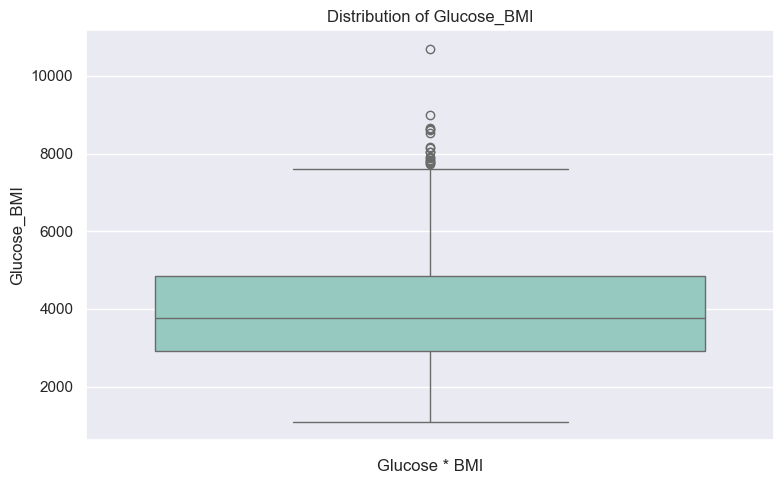

In [80]:
plt.figure(figsize=(8, 5))
sns.boxplot(df['Glucose_BMI'], palette='Set3')
plt.title('Distribution of Glucose_BMI')
plt.xlabel('Glucose * BMI')
plt.tight_layout()
plt.show()

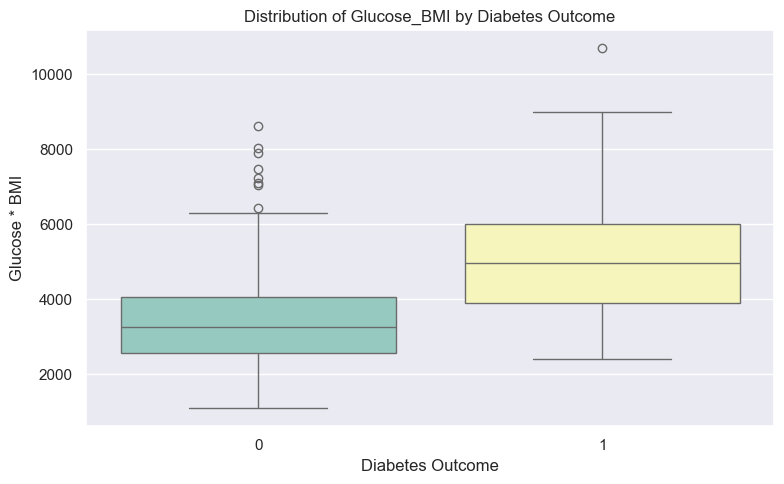

In [81]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outcome', y='Glucose_BMI', data=df, palette='Set3')
plt.title('Distribution of Glucose_BMI by Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Glucose * BMI')
plt.tight_layout()
plt.show()

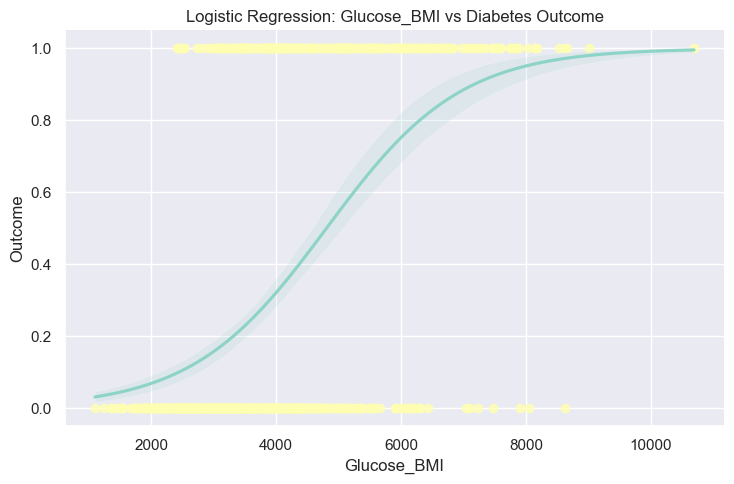

In [82]:
palette = sns.color_palette('Set3')

sns.lmplot(
    x='Glucose_BMI',
    y='Outcome',
    data=df,
    logistic=True,
    height=5,
    aspect=1.5,
    scatter_kws={'color': palette[1]},
    line_kws={'color': palette[0]}
)
plt.title('Logistic Regression: Glucose_BMI vs Diabetes Outcome')
plt.tight_layout()
plt.show()

##### Analysis of Diabetes by `Glucose_BMI` 

The derived feature `Glucose_BMI`, representing the product of glucose concentration and body mass index, exhibits a **strong association** with diabetes presence:

- **Descriptive Statistics**:
  - The average `Glucose_BMI` is approximately **4007**, with values ranging from **1100 to 10,692**.
  - A **high standard deviation (~1480)** and extreme upper values suggest the presence of **notable outliers**, as visualized in the boxplot.

- **Predictive Strength**:
  - `Glucose_BMI` shows a **strong correlation** with diabetes outcome (`r = 0.52`), outperforming either `Glucose` or `BMI` individually.
  - Logistic regression analysis and scatter plots reveal a **clear upward trend**, where higher `Glucose_BMI` values are linked to an increased probability of diabetes.

These findings highlight the value of **multiplicative interactions** between metabolic indicators in enhancing predictive accuracy for diabetes risk models.

##### Feature: `Skin_Insulin_Interaction` (Numeric)

Created to model the interaction between `SkinThickness` and `Insulin` levels, two features that are both associated with `BMI` and show correlations with diabetes outcome.

This interaction aims to reflect **combined effects of body fat distribution and insulin response**, potentially capturing **nonlinear metabolic risk patterns** that enhance the model’s predictive accuracy.

In [83]:
df[['SkinThickness', 'Insulin', 'BMI']].corr()

,SkinThickness,Insulin,BMI
SkinThickness,1.000000,0.206754,0.673379
Insulin,0.206754,1.000000,0.259315
BMI,0.673379,0.259315,1.000000


In [84]:
df['Skin_Insulin_Interaction'] = df['SkinThickness'] * df['Insulin']

In [85]:
df[['Skin_Insulin_Interaction', 'Outcome']].corr()

,Skin_Insulin_Interaction,Outcome
Skin_Insulin_Interaction,1.000000,0.347359
Outcome,0.347359,1.000000


In [86]:
df[['Skin_Insulin_Interaction']].describe()

,Skin_Insulin_Interaction
count,391.000000
mean,4633.271100
std,4210.102709
min,195.000000
25%,1875.000000
50%,3420.000000
75%,5825.000000
max,28371.000000


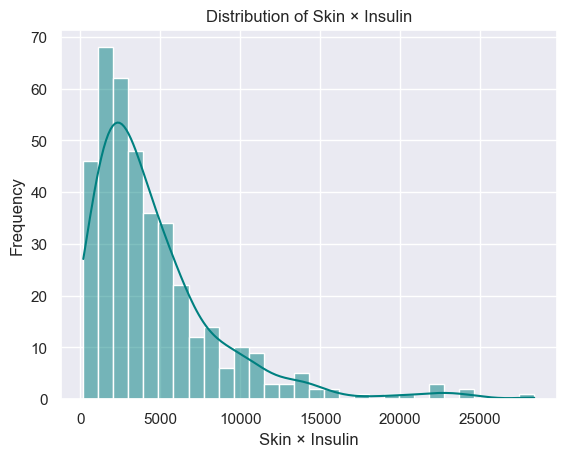

In [87]:
sns.histplot(df["Skin_Insulin_Interaction"], kde=True, bins=30, color='teal')
plt.title("Distribution of Skin × Insulin")
plt.xlabel("Skin × Insulin")
plt.ylabel("Frequency")
plt.show()

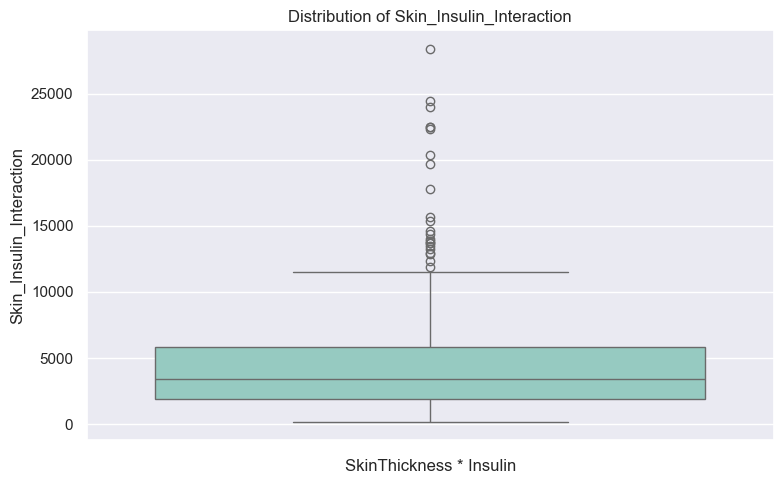

In [88]:
plt.figure(figsize=(8, 5))
sns.boxplot(df['Skin_Insulin_Interaction'], palette='Set3')
plt.title('Distribution of Skin_Insulin_Interaction')
plt.xlabel('SkinThickness * Insulin')
plt.tight_layout()
plt.show()

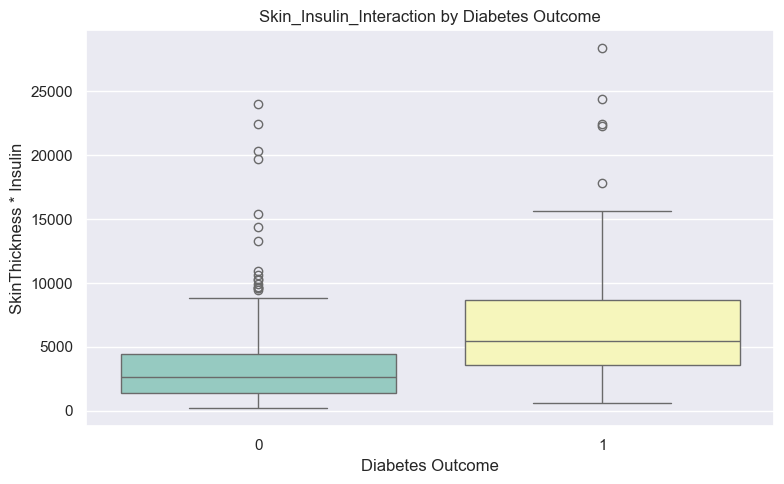

In [89]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outcome', y='Skin_Insulin_Interaction', data=df, palette='Set3')
plt.title('Skin_Insulin_Interaction by Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('SkinThickness * Insulin')
plt.tight_layout()
plt.show()

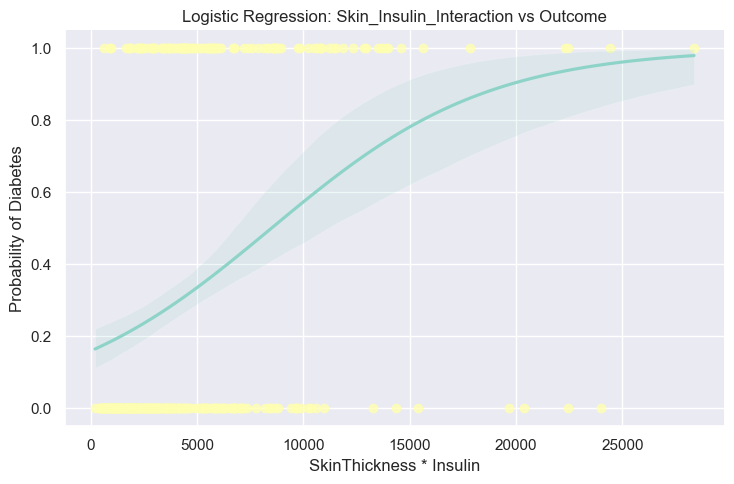

In [90]:
palette = sns.color_palette('Set3')

sns.lmplot(
    x='Skin_Insulin_Interaction',
    y='Outcome', 
    data=df, 
    logistic=True,
    height=5,
    aspect=1.5,
    scatter_kws={'color': palette[1]},
    line_kws={'color': palette[0]}
)
plt.title('Logistic Regression: Skin_Insulin_Interaction vs Outcome')
plt.xlabel('SkinThickness * Insulin')
plt.ylabel('Probability of Diabetes')
plt.tight_layout()
plt.show()

##### Analysis of Diabetes by `Skin_Insulin_Interaction` 

The `Skin_Insulin_Interaction` feature is constructed by multiplying `SkinThickness` and `Insulin` values—two variables that may jointly reflect aspects of **metabolic efficiency** and **insulin-related fat storage**.

- **Descriptive Statistics**:
  - Values span from **195 to 28,371**, with a **mean of ~4633**.
  - A **high standard deviation (~4210)** and the presence of **extreme outliers** are evident, as seen in the boxplot, highlighting considerable variation across individuals.

- **Relationship with Diabetes**:
  - The feature exhibits a **moderate correlation** with diabetes outcome (`r = 0.35`).
  - Boxplots show **higher medians among diabetic individuals**, and logistic regression reveals an **increasing probability of diabetes** with higher interaction values.
  
- **Predictive Insight**:
  - This interaction captures a **nonlinear relationship** that may be **missed by evaluating `Insulin` or `SkinThickness` alone**.
  - As a compound indicator, it offers **additional predictive strength**, helping models better identify those at **elevated diabetes risk**.

This example illustrates how **interaction terms** can unlock **complex dependencies** between physiological factors, enhancing model performance in risk classification.

##### Final Correlation Overview

This table summarizes the correlation of all features with the target variable `Outcome`, including newly engineered features. It serves as a final reference on feature relevance prior to the remaining preprocessing steps.

In [91]:
df.corr()[['Outcome']]

,Outcome
Pregnancies,0.218156
Glucose,0.494452
BloodPressure,0.170936
SkinThickness,0.253102
Insulin,0.309248
BMI,0.313680
DiabetesPedigreeFunction,0.173813
Age,0.237552
Outcome,1.000000
High_Glucose,0.411071


#### Handling Skewness in Numeric Features

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 759 entries, 0 to 767
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               759 non-null    int64  
 1   Glucose                   754 non-null    float64
 2   BloodPressure             727 non-null    float64
 3   SkinThickness             540 non-null    float64
 4   Insulin                   391 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  759 non-null    float64
 7   Age                       759 non-null    int64  
 8   Outcome                   759 non-null    int64  
 9   High_Glucose              759 non-null    int64  
 10  Glucose_BMI               752 non-null    float64
 11  Skin_Insulin_Interaction  391 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 93.2 KB


In [93]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('Outcome').tolist()

In [94]:
numeric_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'High_Glucose',
 'Glucose_BMI',
 'Skin_Insulin_Interaction']

##### Skewness Detection

In [95]:
skewness = df[numeric_cols].skew().sort_values(ascending=False)
skewness

Skin_Insulin_Interaction    2.278560
DiabetesPedigreeFunction    1.910955
Insulin                     1.775534
High_Glucose                1.138803
Age                         1.119069
Pregnancies                 0.911302
Glucose_BMI                 0.870828
BMI                         0.593970
Glucose                     0.525649
BloodPressure               0.336738
SkinThickness               0.197789
dtype: float64

##### Distribution Plots Before Transformation

Histograms with **kernel density estimates (KDE)** are used to examine the **initial distribution**, **skewness**, and **potential abnormalities** in numeric features prior to applying transformation.

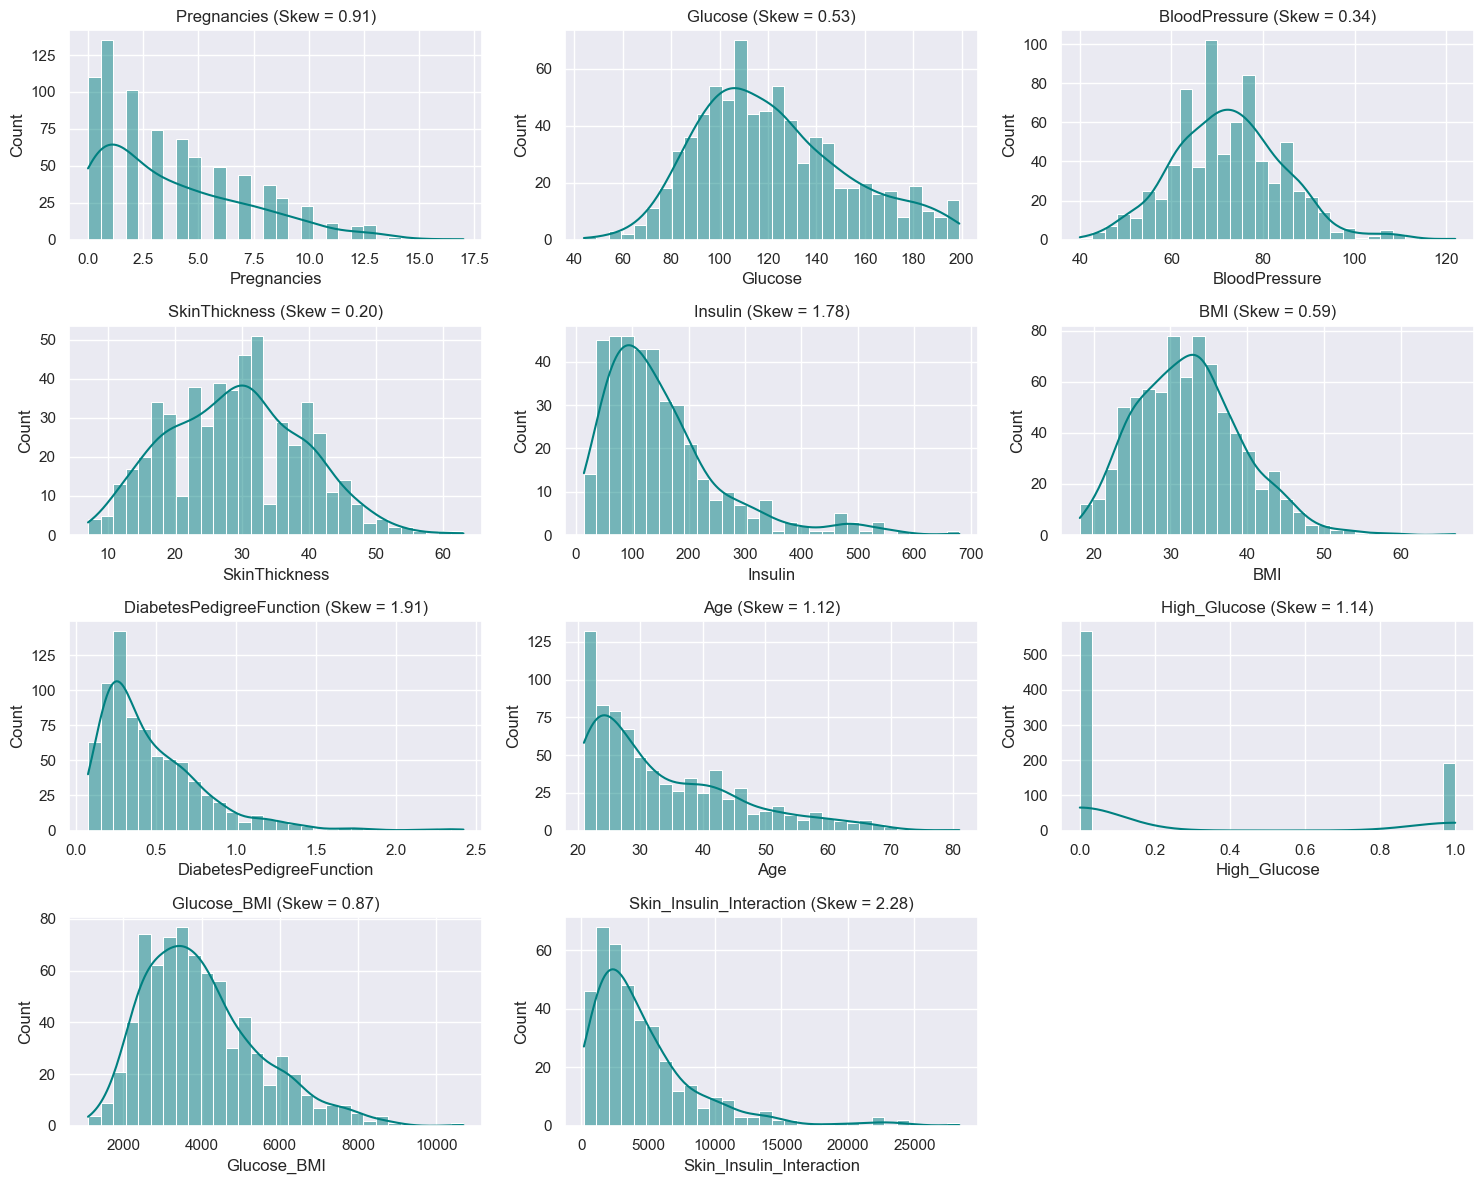

In [96]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='teal')
    plt.title(f"{col} (Skew = {skewness[col]:.2f})")
plt.tight_layout()
plt.show()

##### Skewness Correction Using Yeo-Johnson Transformation

Applied to features with **high skewness** (|skew| > 1), the **Yeo-Johnson transformation** helps normalize distributions by accommodating both **positive and negative values**.

The domain-relevant feature `High_Glucose` is **excluded** from this transformation to **preserve its clinical interpretability** as a binary marker of hyperglycemia.

In [97]:
skewed_features = skewness[abs(skewness) > 1].index.tolist()
skewed_features = [col for col in skewed_features if col != 'High_Glucose']

pt = PowerTransformer(method='yeo-johnson', standardize=False)
df[skewed_features] = pt.fit_transform(df[skewed_features])

print("Transformed features:", skewed_features)

Transformed features: ['Skin_Insulin_Interaction', 'DiabetesPedigreeFunction', 'Insulin', 'Age']


In [98]:
df[skewed_features].skew()

Skin_Insulin_Interaction   -0.004763
DiabetesPedigreeFunction    0.140135
Insulin                     0.001155
Age                         0.146627
dtype: float64

##### Distribution Plots After Transformation

Updated **histograms with KDE overlays** are generated to assess the impact of transformation on feature distributions.

These visualizations confirm **reduced skewness** across targeted variables, validating the effectiveness of the applied normalization techniques.

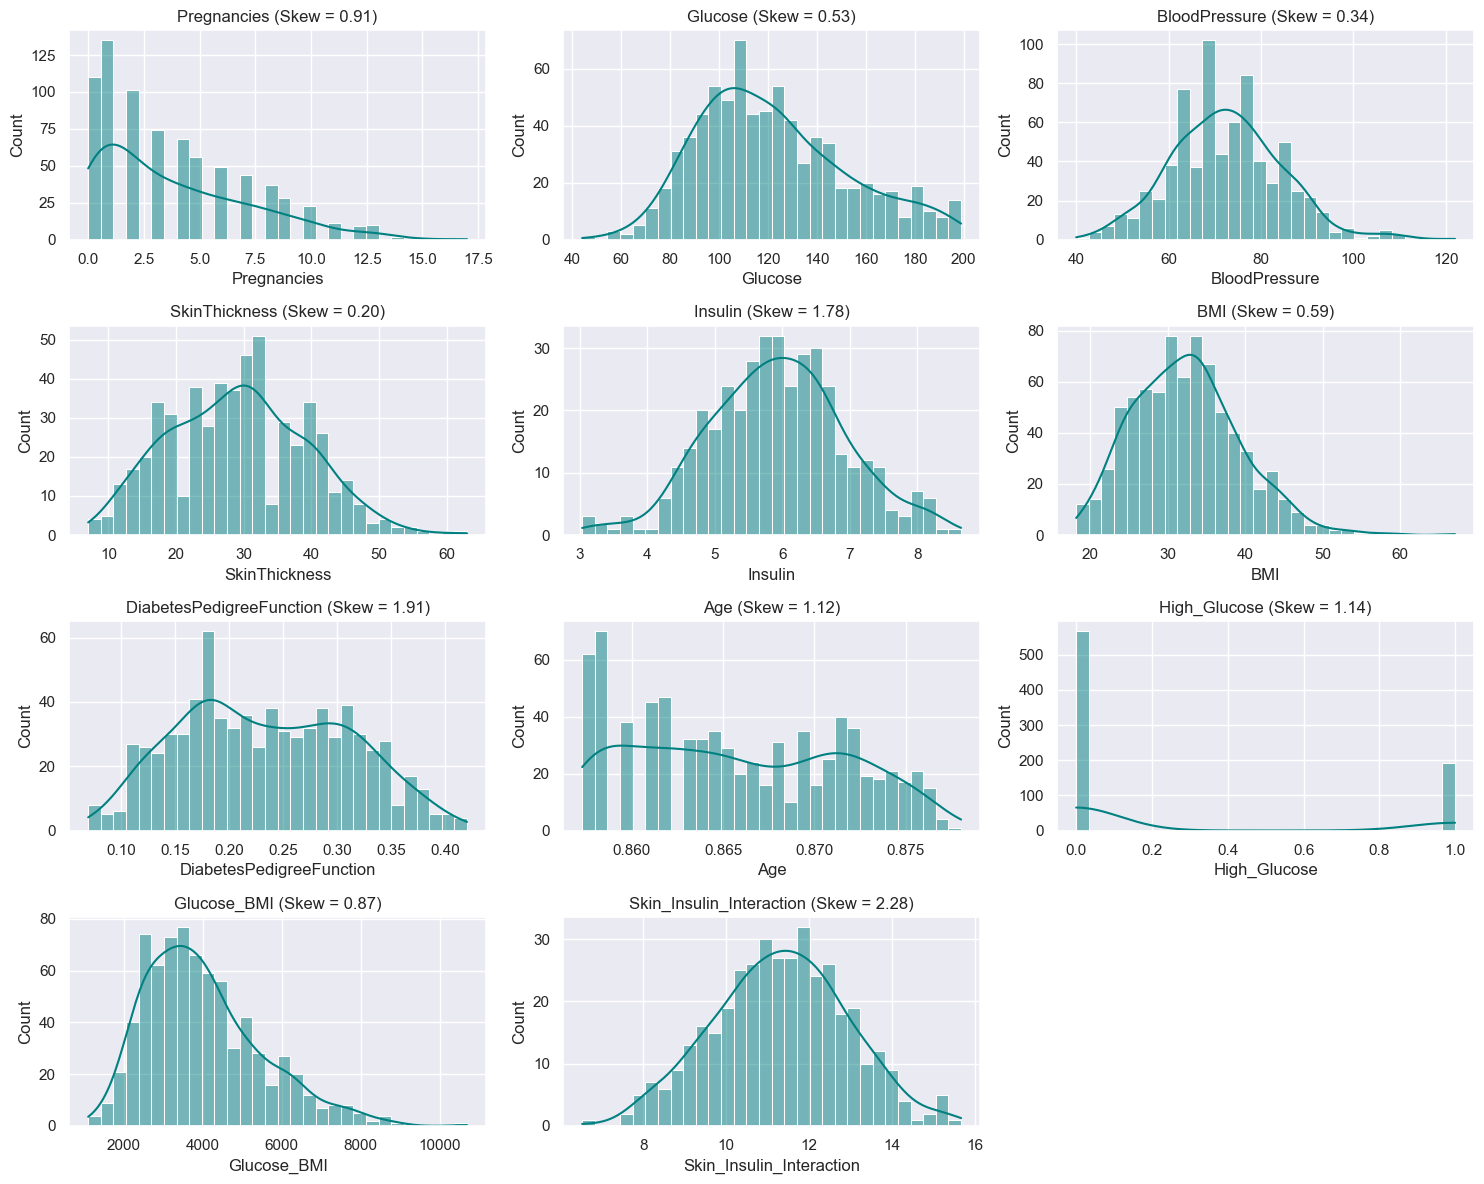

In [99]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='teal')
    plt.title(f"{col} (Skew = {skewness[col]:.2f})")
plt.tight_layout()
plt.show()

#### Standardization of Numeric Features

Numeric features are **standardized** to have a mean of 0 and a standard deviation of 1 using `StandardScaler`.

This transformation is critical for **distance-based** (e.g., KNN) and **gradient-based** (e.g., logistic regression) algorithms to perform optimally.  
Distribution plots **before and after scaling** confirm the shift toward standardized ranges, ensuring comparability across features.

##### Feature Selection for Standardization

In [100]:
numeric_cols = [col for col in numeric_cols if col not in ['High_Glucose']]
numeric_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Glucose_BMI',
 'Skin_Insulin_Interaction']

##### Boxplot Visualization Before Standardization

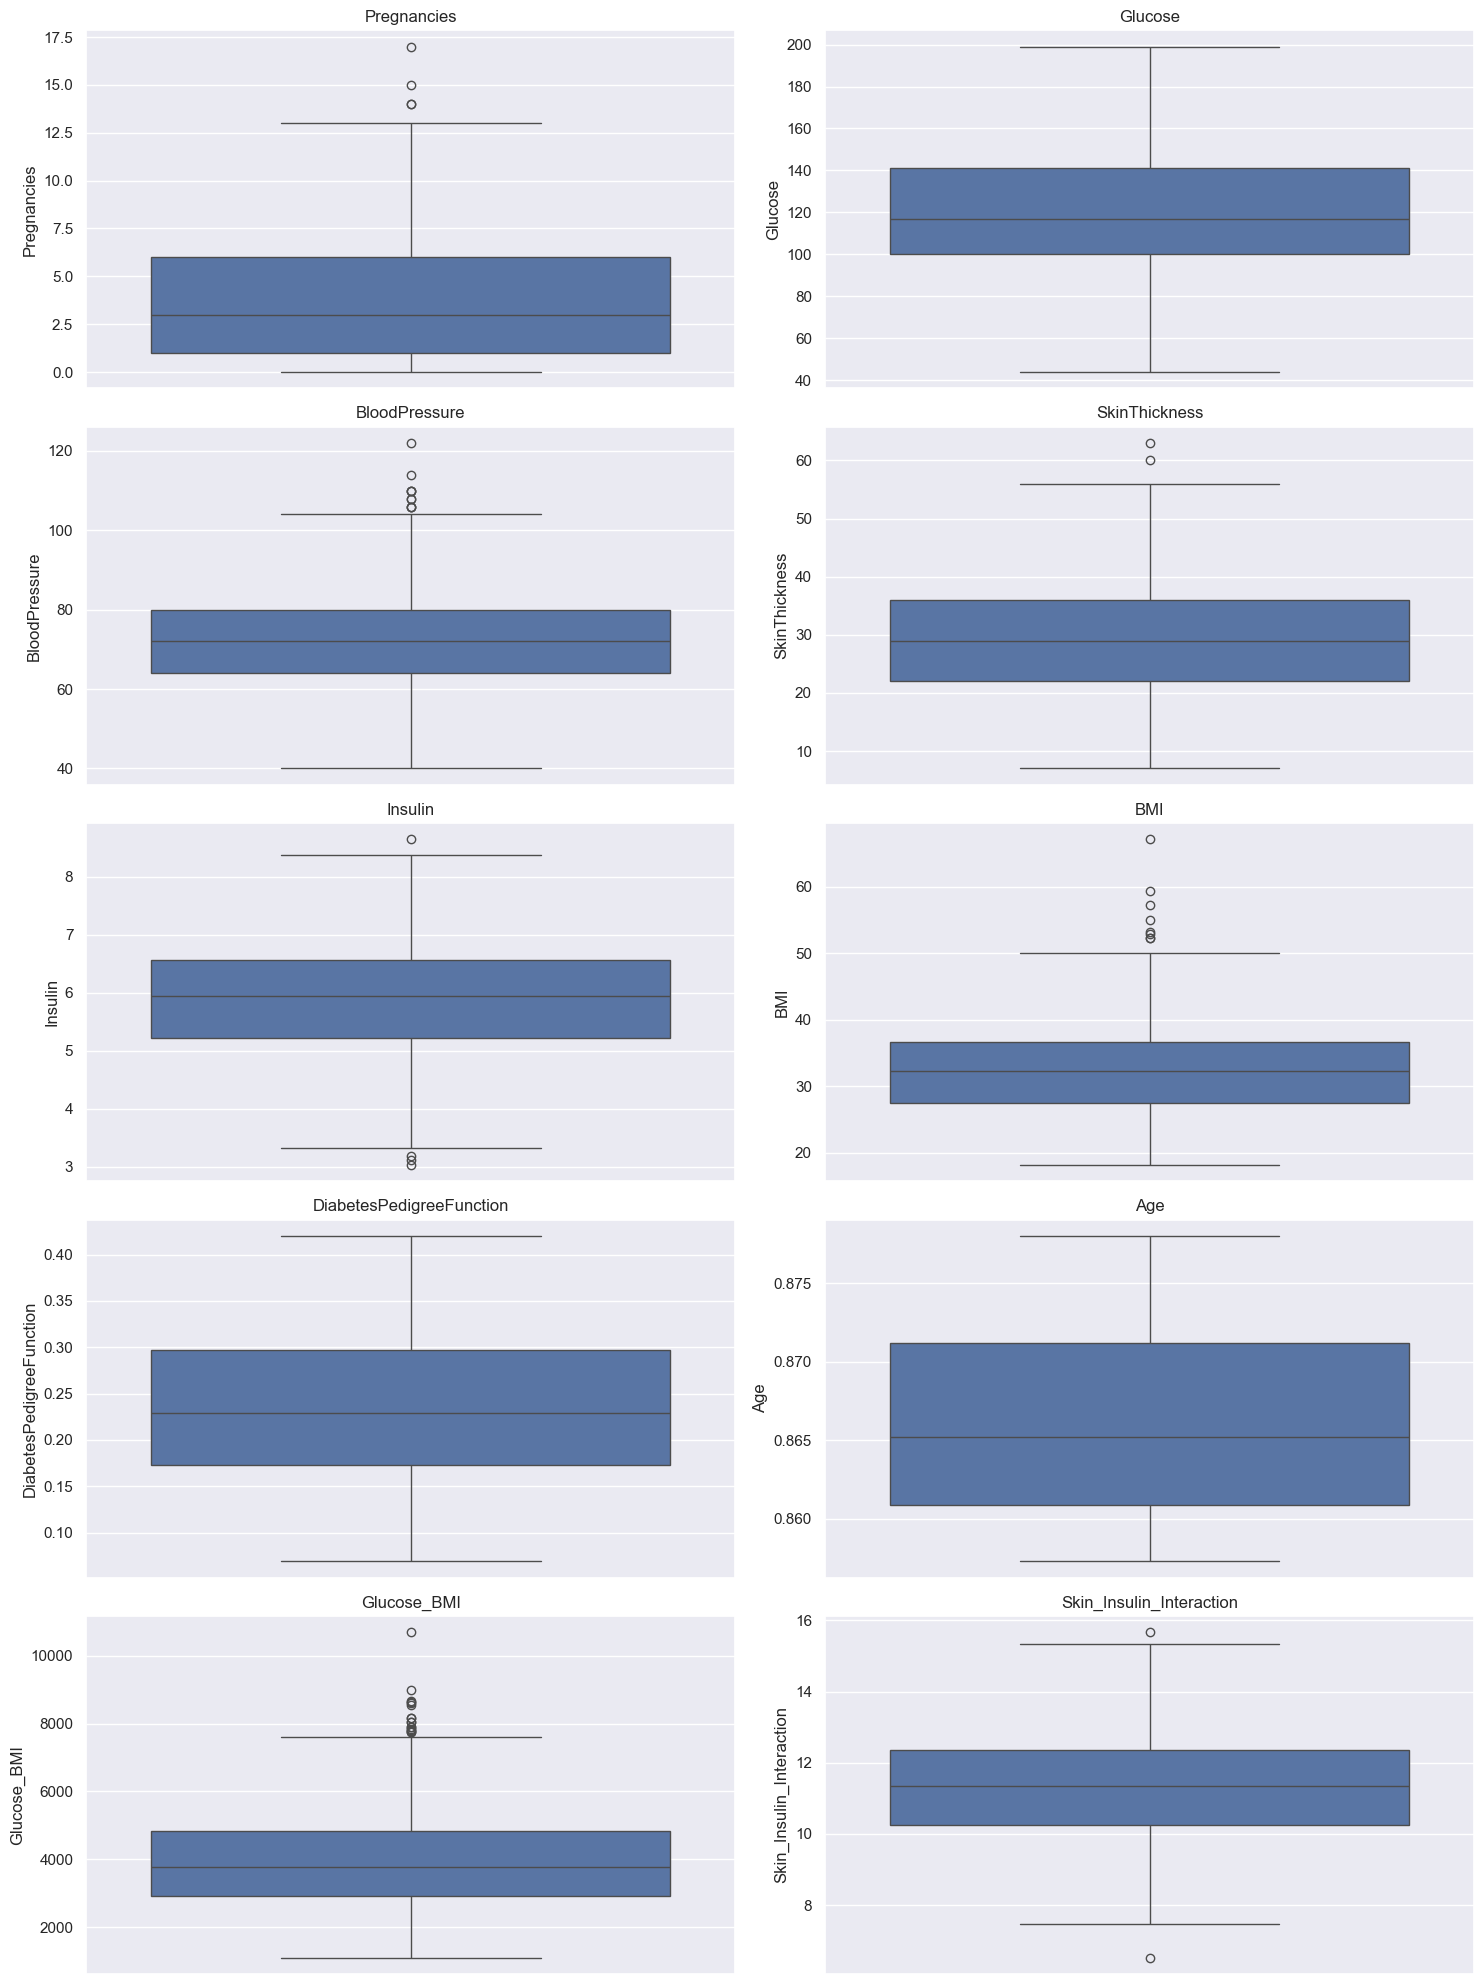

In [101]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_cols):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(y=df[col], color='b')
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

##### Feature Standardization

In [102]:
scaler = StandardScaler()

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

##### Boxplot Visualization After Standardization

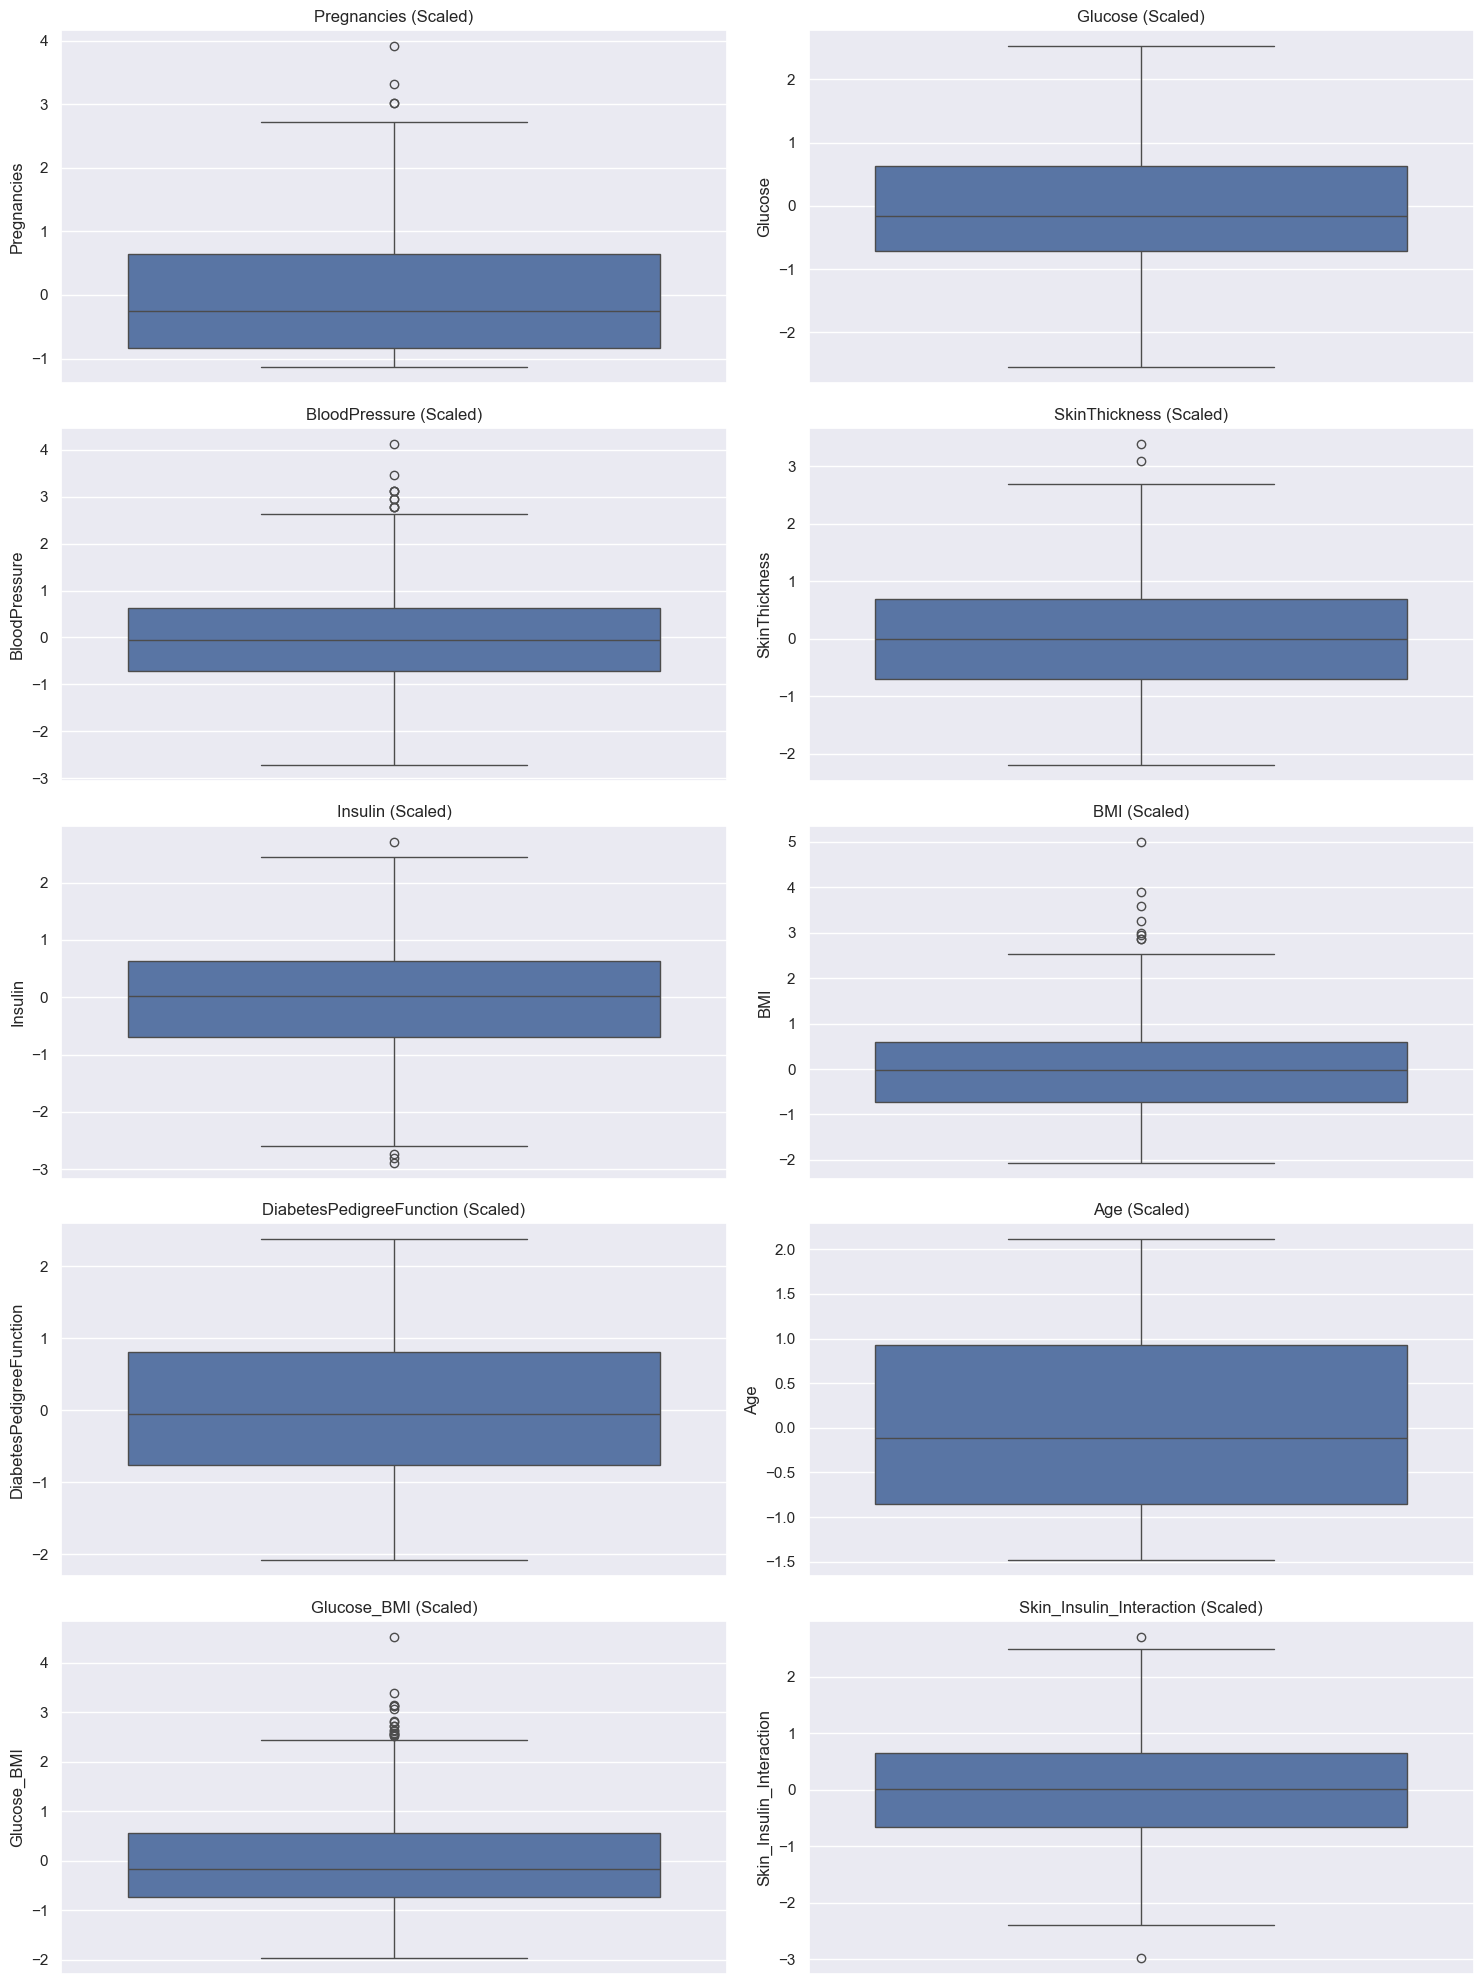

In [103]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_cols):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(y=df[col], color='b')
    plt.title(f"{col} (Scaled)")
plt.tight_layout()
plt.show()

#### Handling Class Imbalance with Random Oversampling

The `Outcome` variable exhibits **class imbalance**, which can bias model predictions and reduce sensitivity to the minority class (diabetes-positive cases).

To address this, `RandomOverSampler` is applied to **replicate minority class samples**, creating a **balanced class distribution**.  
This correction supports **fairer model training** and improves the ability to generalize across both classes during prediction.

In [104]:
X = df.drop(columns='Outcome')
y = df['Outcome']

In [105]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,High_Glucose,Glucose_BMI,Skin_Insulin_Interaction
0,0.642911,0.854038,-0.049235,0.595464,NaN,0.165097,0.811951,1.365765,1,0.653023,NaN
1,-0.841182,-1.208208,-0.549848,-0.002399,NaN,-0.846404,-0.178713,0.120521,0,-1.180283,NaN
2,1.236549,1.999730,-0.716719,NaN,NaN,-1.323254,0.925839,0.224480,1,0.173772,NaN
3,-0.841182,-1.077272,-0.549848,-0.600262,-0.396718,-0.629654,-1.305096,-1.483466,0,-1.018100,-0.506534
4,-1.138000,0.493963,-2.719170,0.595464,0.461047,1.537847,2.341039,0.321936,0,1.283031,0.666183
...,...,...,...,...,...,...,...,...,...,...,...
763,1.830186,-0.684463,0.284507,1.890835,0.565948,0.063947,-1.274366,1.772064,0,-0.462388,1.142127
764,-0.544363,0.002952,-0.216106,-0.201687,NaN,0.627497,-0.232404,-0.374976,0,0.326356,NaN
765,0.346093,-0.029782,-0.049235,-0.600262,-0.142626,-0.904204,-0.761884,0.009400,0,-0.565621,-0.307719
766,-0.841182,0.133888,-1.050461,NaN,NaN,-0.340654,-0.188370,1.238441,0,-0.144849,NaN


In [106]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 759, dtype: int64

In [107]:
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)

In [108]:
y.value_counts()

Outcome
1    493
0    493
Name: count, dtype: int64

#### Splitting the Dataset for Training and Evaluation

In [109]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [110]:
print('X_train shape is: ', X_train.shape)
print('X_test shape is: ', X_test.shape)
print('y_train shape is: ', y_train.shape)
print('y_test shape is: ', y_test.shape)

X_train shape is:  (788, 11)
X_test shape is:  (198, 11)
y_train shape is:  (788,)
y_test shape is:  (198,)


#### Model Initialization

A diverse suite of gradient-boosting and ensemble classifiers is selected to evaluate predictive performance on diabetes classification.

The models — *Random Forest*, **XGBoost**, **LightGBM**, **CatBoost**, and **HistGradientBoosting** — are particularly well-suited for tabular medical data due to their ability to **handle missing values natively**.  
This intrinsic handling reduces reliance on manual imputation, which can introduce bias or obscure clinically relevant patterns, thereby enhancing model robustness and interpretability.

In [111]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "HistGradientBoosting": HistGradientBoostingClassifier(random_state=42)
}

model_names = []
accuracy_result = []
precision_result = []
recall_result = []
f1_result = []

##### Model Evaluation and Performance Metrics 

Implements a reusable procedure to train each model and assess performance using key evaluation metrics:  
**Accuracy**, **Precision**, **Recall**, and **F1-score**.  
Outputs include the classification report and confusion matrix for diagnostic insights, and the results are recorded for comparative analysis.

In [112]:
def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    model_names.append(name)
    accuracy_result.append(acc)
    precision_result.append(prec)
    recall_result.append(rec)
    f1_result.append(f1)

    print(f"----- {name} -----")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1-score:", f1)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

#### Training and Evaluating Models

Each classifier is trained on the stratified training set and evaluated on the test set using the defined metrics.  
Results are printed and visualized to assess individual model performance and misclassification patterns.

----- Random Forest -----
Accuracy: 0.8636363636363636
Precision: 0.8214285714285714
Recall: 0.9292929292929293
F1-score: 0.8720379146919431

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.85        99
           1       0.82      0.93      0.87        99

    accuracy                           0.86       198
   macro avg       0.87      0.86      0.86       198
weighted avg       0.87      0.86      0.86       198


Confusion Matrix:
 [[79 20]
 [ 7 92]]


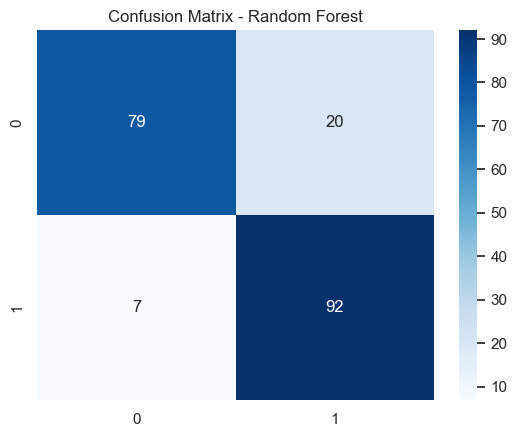

----- XGBoost -----
Accuracy: 0.8383838383838383
Precision: 0.7913043478260869
Recall: 0.9191919191919192
F1-score: 0.8504672897196262

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.76      0.82        99
           1       0.79      0.92      0.85        99

    accuracy                           0.84       198
   macro avg       0.85      0.84      0.84       198
weighted avg       0.85      0.84      0.84       198


Confusion Matrix:
 [[75 24]
 [ 8 91]]


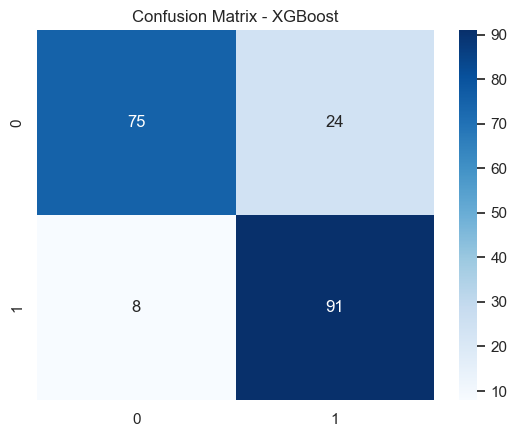

[LightGBM] [Info] Number of positive: 394, number of negative: 394
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1135
[LightGBM] [Info] Number of data points in the train set: 788, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

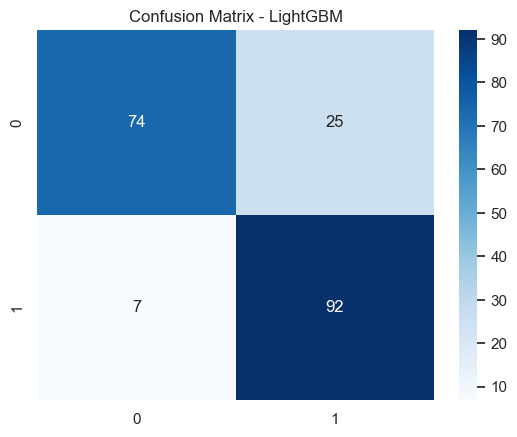

----- CatBoost -----
Accuracy: 0.8333333333333334
Precision: 0.7844827586206896
Recall: 0.9191919191919192
F1-score: 0.8465116279069768

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82        99
           1       0.78      0.92      0.85        99

    accuracy                           0.83       198
   macro avg       0.84      0.83      0.83       198
weighted avg       0.84      0.83      0.83       198


Confusion Matrix:
 [[74 25]
 [ 8 91]]


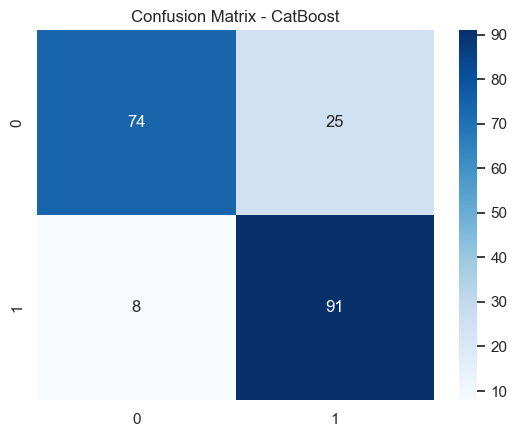

----- HistGradientBoosting -----
Accuracy: 0.8333333333333334
Precision: 0.7844827586206896
Recall: 0.9191919191919192
F1-score: 0.8465116279069768

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82        99
           1       0.78      0.92      0.85        99

    accuracy                           0.83       198
   macro avg       0.84      0.83      0.83       198
weighted avg       0.84      0.83      0.83       198


Confusion Matrix:
 [[74 25]
 [ 8 91]]


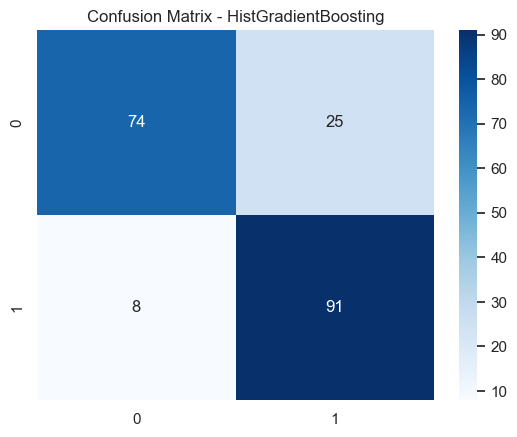

In [113]:
for name, model in models.items():
    evaluate_model(name, model)

#### Model Performance Summary and Visualization

Aggregates the evaluation results into a DataFrame for structured comparison across models.  
A line plot visualizes the relative performance of each classifier in terms of **Accuracy**, **Precision**, **Recall**, and **F1-score**.

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.863636,0.821429,0.929293,0.872038
1,XGBoost,0.838384,0.791304,0.919192,0.850467
2,LightGBM,0.838384,0.786325,0.929293,0.851852
3,CatBoost,0.833333,0.784483,0.919192,0.846512
4,HistGradientBoosting,0.833333,0.784483,0.919192,0.846512


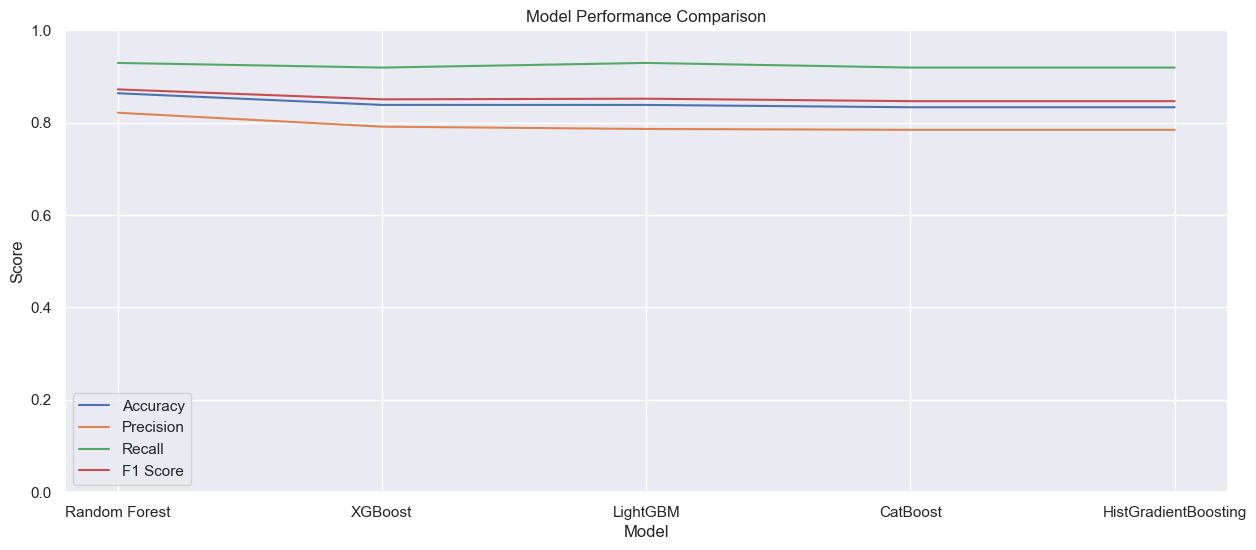

In [114]:
df_results = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_result,
    'Precision': precision_result,
    'Recall': recall_result,
    'F1 Score': f1_result
})

display(df_results)

plt.figure(figsize=(15, 6))
plt.plot(df_results['Model'], df_results['Accuracy'], label='Accuracy')
plt.plot(df_results['Model'], df_results['Precision'], label='Precision')
plt.plot(df_results['Model'], df_results['Recall'], label='Recall')
plt.plot(df_results['Model'], df_results['F1 Score'], label='F1 Score')
plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

#### Model Performance Summary

Among the evaluated models, **Random Forest** achieved the highest overall performance, particularly in **recall (92.9%)** and **F1 score (87.2%)**, indicating strong predictive capability for identifying positive cases.  
Other ensemble models like **XGBoost**, **LightGBM**, **CatBoost**, and **HistGradientBoosting** also delivered competitive results with balanced precision and recall.

Despite the relatively small dataset and the moderate correlation between individual features and the target variable, the application of targeted feature engineering—such as interaction terms and domain-informed transformations—significantly improved model performance.  
This highlights the importance of thoughtful preprocessing when working with limited and weakly correlated data.

## Final Thoughts

This project demonstrated the effective application of machine learning techniques to predict diabetes outcomes using a small but informative dataset.  
Through strategic preprocessing, thoughtful feature engineering, and the use of ensemble models, predictive performance was significantly improved despite modest initial correlations.

The results emphasize the importance of domain-guided transformations and careful data handling in building reliable models, even under data constraints.

---

**Thank you for exploring this project.**